# Project: TMDB Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    <ul>
        <li><a href="#Overview">Overview</a></li>
        <li><a href="#Question">Question</a></li>
    </ul>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#Gather" >Gather</a></li>
        <li><a href="#Assess" >Assess</a></li>
        <ul>
            <li><a href="#Quality">Quality</a></li>
            <li><a href="#Tidness">Tidness</a></li>
        </ul>
        <li><a href="#Data-Cleaning-(modify-the-problem-in-the-assessment)" >Clean</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



### Overview

In this project we will be analyzing data associated with movies from TMDB, we will be interested in finding best movies to recommend to user who first time getting in the site and the data will be suitable for any one want to take it and use it in his recommendation engine
TMDB is an abbreviation for The Movie Data Base. It is an open source database for movie and always in update.
cleaned from original data on [kaggle](https://www.kaggle.com/joniarroba/noshowappointments)


### Question 

1. [What kinds of properties are associated with movie with largest and smallest budget?](#Research-Question-1-(What-kinds-of-properties-are-associated-with-movie-with-largest-and-smallest-budget?))
2. [What kinds of properties are associated with movie with largest and smallest revenue?](#Research-Question-2--(What-kinds-of-properties-are-associated-with-movie-with-largest-and-smallest-revenue?))
3. What is the average budget to make a movie?
4. What is the average revenue gained from a movie?
5. [who is the most acting actor?](#Research-Question-3--(who-is-the-most-acting-actor?))
6. [What kinds of properties are associated with the movie with largest cast?](#Research-Question-4--(What-kinds-of-properties-are-associated-with-the-movie-with-largest-cast?))
7. [Who is the most directed director?](#Research-Question-5--(Who-is-the-most-directed-director?))
8. [What are the most repeated keywords?](#Research-Question-6--(What-are-the-most-repeated-keywords?))
9. [What kinds of properties are associated with longest movie?](#Research-Question-7-(What-kinds-of-properties-are-associated-with-longest-movie?))
10. What is the average time of the movies?
11. [What kinds of properties are associated with movie with largest genre?](#Research-Question-8--(What-kinds-of-properties-are-associated-with-movie-with-largest-genre?))
12. [What is the most repeated genre?](#Research-Question-9--(What-is-the-most-repeated-genre?))
13. [Which genres are most popular from year to year?](#Research-Question-10--(Which-genres-are-most-popular-from-year-to-year?))
14. [What kinds of properties are associated with the most popular companies that produce the movies?](#Research-Question-11--(What-kinds-of-properties-are-associated-with-the-most-popular-companies-that-produce-the-movies?))
15. What kinds of properties are associated with movie that have most people loves (have highest rating)?
16. What is the average vote_average for the movies?
17. [What kinds of properties are associated with movie with largest vote_count?](#Research-Question-13--(What-kinds-of-properties-are-associated-with-movie-with-largest-vote_count?))
18. What is the average vote_count for the movies?
19. [What is the year with largest movie released?](#Research-Question-14-(What-is-the-year-with-largest-movie-released?))
20. [What is the month with largest movie released?](#Research-Question-15--(What-is-the-month-with-largest-movie-released?))
21. [What is the month and year with largest movie released?](#Research-Question-16--(What-is-the-month-and-year-with-largest-movie-released?))
22. [What is the actor that brings the highest revenue?](#Research-Question-17--(What-is-the-actor-that-brings-the-highest-revenue?))
23. [What is the director that brings the highest revenue?](#Research-Question-18--(What-is-the-director-that-brings-the-highest-revenue))
24. [What is the actor that brings the highest vote_average?](#Research-Question-19--(What-is-the-actor-that-brings-the-highest-vote_average?))
25. [What is the director that brings the highest vote_average?](#Research-Question-20--(What-is-the-director-that-brings-the-highest-vote_average?))
26. [What is the actor that brings the highest vote_count?]()
27. [What is the director that brings the highest vote_count?]()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

## Gather

In [2]:
# Load tmdb data 
tmdb_df = pd.read_csv("tmdb-movies.csv")

In [3]:
# Explore the data by taking samples
tmdb_df.sample(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10140,29478,tt0055353,0.027527,1500000,0,A Raisin in the Sun,Sidney Poitier|Claudia McNeil|Ruby Dee|Diana S...,NaN,Daniel Petrie,The Prize-Winning Drama that Warms the Screen ...,...,Walter Lee Younger is a young man struggling w...,128,Romance|Drama,Columbia Pictures Corporation,5/28/61,13,6.3,1961,1.094229e+07,0.000000e+00
204,333381,tt2948790,0.696184,0,0,Return to Sender,Rosamund Pike|Rumer Willis|Nick Nolte|Scout Ta...,NaN,Fouad Mikati,She will have he revenge.,...,A nurse living in small town goes on a blind d...,95,Thriller,Voltage Pictures|Arrow Films|Boo Pictures,5/31/15,88,5.0,2015,0.000000e+00,0.000000e+00
9019,11545,tt0128445,0.870429,0,0,Rushmore,Jason Schwartzman|Bill Murray|Olivia Williams|...,NaN,Wes Anderson,Love. Expulsion. Revolution.,...,"Max Fischer, a precocious and eccentric 15 yea...",93,Comedy|Drama,Touchstone Pictures,9/17/98,357,7.5,1998,0.000000e+00,0.000000e+00
1939,44264,tt1403865,2.100704,38000000,252276927,True Grit,Jeff Bridges|Hailee Steinfeld|Matt Damon|Josh ...,http://www.truegritmovie.com/,Ethan Coen|Joel Coen,Punishment Comes One Way or Another.,...,Following the murder of her father by hired ha...,110,Drama|Adventure|Western,Paramount Pictures|Scott Rudin Productions|Mik...,12/22/10,1084,7.0,2010,3.800000e+07,2.522769e+08
10395,17803,tt0106188,0.143989,0,0,12:01,Jonathan Silverman|Helen Slater|Martin Landau|...,NaN,Jack Sholder,Every day at a minute past midnight the sci-fi...,...,"Office employee Barry Thomas is caught in a ""t...",92,Science Fiction|Thriller,Chanticleer Films|Fox West Pictures|New Line T...,7/5/93,18,5.9,1993,0.000000e+00,0.000000e+00
9513,18214,tt0094750,0.361962,0,0,Black Eagle,Sho Kosugi|Jean-Claude Van Damme|Doran Clark|B...,NaN,Eric Karson,NaN,...,One of the US Air Force's most modern tactical...,93,Drama|Action,Magus Productions|Rotecon B.V.,5/1/88,18,3.8,1988,0.000000e+00,0.000000e+00
2633,120,tt0120737,8.575419,93000000,871368364,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,http://www.lordoftherings.net/,Peter Jackson,One ring to rule them all,...,"Young hobbit Frodo Baggins, after inheriting a...",178,Adventure|Fantasy|Action,WingNut Films|New Line Cinema|The Saul Zaentz ...,12/18/01,6079,7.8,2001,1.145284e+08,1.073080e+09
1957,23168,tt0840361,1.614028,37000000,154026136,The Town,Ben Affleck|Rebecca Hall|Jeremy Renner|Jon Ham...,http://thetownmovie.warnerbros.com/,Ben Affleck,Welcome to the bank robbery capital of America.,...,"Doug MacRay is a longtime thief, who, smarter ...",125,Crime|Drama|Thriller,Legendary Pictures|GK Films|Thunder Road Pictu...,9/15/10,930,6.9,2010,3.700000e+07,1.540261e+08
7542,13257,tt0419984,0.529537,22000000,0,Mr. Woodcock,Billy Bob Thornton|Seann William Scott|Susan S...,NaN,Craig Gillespie,Letting Go of Your Past Is Hard... Especially ...,...,Taken aback by his mother's wedding announceme...,87,Comedy|Romance,Avery Pix|Landscape Entertainment,9/14/07,72,4.7,2007,2.313671e+07,0.000000e+00
6274,5289,tt0402910,0.792950,12000000,10289,Chaos,Jason Statham|Ryan Phillippe|Wesley Snipes|Hen...,NaN,Tony Giglio,When the system breaks down... someone is abou...,...,"Two cops, a rookie and a grizzled vet, pursue ...",106,Drama|Action|Crime,Current Entertainment|Epsilon Motion Pictures|...,1/17/05,162,6.3,2005,1.339876e+07,1.148832e+04


In [4]:
# Identify what columns we have as we couldn't see all of them using head() in the previous cell
tmdb_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
# Identify the columns that have null and identify the type of the variable this will help us in the assessment.
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Get the descriptive statistics
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# See runtime from min to max
tmdb_df.sort_values('runtime')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.0,0.000000e+00
3857,289097,tt1288636,0.095583,0,0,Cell 213,Bruce Greenwood|Eric Balfour|Michael Rooker|De...,NaN,Stephen Kay,NaN,...,Cocky young attorney Michael Gray finds himsel...,0,Horror,Access Motion Pictures,6/10/11,13,5.2,2011,0.0,0.000000e+00
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.0,0.000000e+00
2315,48373,tt1274296,0.171615,0,0,Listen to Your Heart,Alexia Rasmussen|Kent Moran|Cybill Shepherd|Sh...,http://www.listentoyourheartfilm.com/,NaN,One song can change your life.,...,Danny Foster doesn't have much: an apartment a...,0,Drama|Music|Romance,NaN,8/14/10,29,7.3,2010,0.0,0.000000e+00
3884,105885,tt1754944,0.045198,0,0,eCupid,Houston Rhines|Andy Anderson|John Callahan|Gal...,NaN,J.C. Calciano,NaN,...,From the director of Is It Just Me? comes this...,0,Romance,NaN,6/23/11,12,4.6,2011,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6181,18729,tt0088583,0.000065,0,0,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,NaN,NaN,NaN,...,"Two friends, one northern and one southern, st...",561,Drama|History|Western,NaN,11/3/85,17,6.0,1985,0.0,0.000000e+00
6176,42044,tt0090015,0.147489,0,0,Shoah,Simon Srebnik|Michael Podchlebnik|Motke Zaidl,NaN,Claude Lanzmann,NaN,...,Claude Lanzmann directed this 9 1/2 hour docum...,566,Documentary,British Broadcasting Corporation (BBC)|MinistÃ...,11/1/85,16,8.3,1985,0.0,0.000000e+00
2722,331214,tt0185906,0.537593,0,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,http://www.hbo.com/band-of-brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,Ordinary men. Extraordinary times.,...,Drawn from interviews with survivors of Easy C...,705,Action|Drama|War,HBO,9/9/01,313,8.0,2001,0.0,1.539360e+08
4041,150004,tt0289830,0.469332,0,0,Taken,Dakota Fanning|Matt Frewer|Eric Close|Emily Be...,NaN,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,Some secrets we keep. Some are kept from us,...,"Taken spans five decades and four generations,...",877,Science Fiction,DreamWorks,12/2/02,38,6.8,2002,0.0,0.000000e+00


In [8]:
# How many movies have a runtime 0
tmdb_df[tmdb_df.runtime==0].shape[0]

31

In [9]:
# Change id to string for the next check
d = tmdb_df.id.astype('string')

In [10]:
# check if id is less than 5
tmdb_df[d.str.len()<5]#.shape

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
710,189,tt0458481,1.840817,65000000,39407616,Sin City: A Dame to Kill For,Mickey Rourke|Jessica Alba|Josh Brolin|Joseph ...,http://sincity-2.com/,Frank Miller|Robert Rodriguez,There is no justice without sin.,...,Some of Sin City's most hard-boiled citizens c...,102,Crime|Thriller,Miramax Films|Troublemaker Studios|AR Films|Al...,8/20/14,857,6.2,2014,5.987092e+07,3.629800e+07
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09
1330,691,tt0076752,2.379469,14000000,185438673,The Spy Who Loved Me,Roger Moore|Barbara Bach|Curd JÃ¼rgens|Richard...,http://www.mgm.com/view/movie/1891/The-Spy-Who...,Lewis Gilbert,It's the BIGGEST. It's the BEST. It's BOND. An...,...,Russian and British submarines with nuclear mi...,125,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,7/7/77,279,6.2,1977,5.036893e+07,6.671677e+08
1332,703,tt0075686,1.179653,4000000,38251425,Annie Hall,Woody Allen|Diane Keaton|Tony Roberts|Carol Ka...,NaN,Woody Allen,A nervous romance.,...,"In the city of New York, comedian Alvy Singer ...",93,Comedy|Drama|Romance,United Artists,4/19/77,493,7.6,1977,1.439112e+07,1.376203e+08
1334,840,tt0075860,1.104816,20000000,303788635,Close Encounters of the Third Kind,Richard Dreyfuss|FranÃ§ois Truffaut|Teri Garr|...,NaN,Steven Spielberg,We are not alone.,...,"After an encounter with UFOs, a line worker fe...",135,Science Fiction|Drama,Columbia Pictures Corporation|EMI Films|Julia ...,11/16/77,600,7.0,1977,7.195562e+07,1.092965e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10845,5065,tt0059014,0.230873,0,0,Carry On Cowboy,Sid James|Jim Dale|Angela Douglas|Kenneth Will...,NaN,Gerald Thomas,How the west was lost!,...,Stodge City is in the grip of the Rumpo Kid an...,93,Comedy|Western,Peter Rogers Productions,3/1/66,15,5.9,1966,0.000000e+00,0.000000e+00
10848,2161,tt0060397,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,NaN,Richard Fleischer,A Fantastic and Spectacular Voyage... Through ...,...,The science of miniaturization has been unlock...,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07
10857,5921,tt0060748,0.131378,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,NaN,Henry Hathaway,Some called him savage- and some called him sa...,...,Nevada Smith is the young son of an Indian mot...,128,Action|Western,Paramount Pictures|Solar Productions|Embassy P...,6/10/66,10,5.9,1966,0.000000e+00,0.000000e+00
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.000000e+00,0.000000e+00


### Assess

**Qualitative (Categorical) variable**
* id
* imdb_id
* original_title
* cast
* homepage
* director
* tagline
* overview
* genres
* production_companies
* release_date

**Quantitative (Numerical) variable**
* popularity
* budget
* revenue
* runtime
* budget_adj
* revenue_adj

All Categorical data should be categorical or string and all Numerical should be integer or float.

## Quality
* id int not category or category
* release_year int not string
* Change the date format to write all the year instead of 66,77 ....
* release_date string not datetime
* Some budget and revenue, budget_adj and revenue_adj are zeros	
* Some id's have length less than 6
* Many movie have 0 runtime
* The Story of Film: An Odyssey has runtime 900 instead of 60
* director column has null cells

## Tidness
* No need to release_year
* We can add new column to the movie_url in IMDB

### Data Cleaning (modify the problem in the assessment)

In [11]:
# make a copy to restore the main data if needed
tmdb_df_clean = tmdb_df.copy()

### Quality

### Define
ID type is integer not string although it is categorical data we will use [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) to change it.

### Code

In [12]:
# make id type is string
tmdb_df_clean.id=tmdb_df_clean.id.astype('string')

### Test

In [13]:
# Check if cleaned
tmdb_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  string 
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

------

### Define 
release_year is int while it should be string we will use [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) to change it.

### Code

In [14]:
# make release_year string
tmdb_df_clean.release_year=tmdb_df_clean.release_year.astype('string')

### Test

In [15]:
# Check if changed or not
tmdb_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  string 
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Define
Change the date format to write all the year instead of 66 to 1966,77 to 1977...etc.
We will use the fact that the largest year is 2015 so any number larger than 15 then it will be 19+the year .i.e. 70 > 15 then will be 1970 

We will make it using the release_year column

### Code

In [16]:
# change year from 66 to 1966 and 15 to 2015 and so on
tmdb_df_clean.release_date=tmdb_df_clean.release_date.str.extract(r'(\d+/\d+/)')[0]+tmdb_df_clean.release_year

### Test

In [17]:
# Check if release_date changed to as we want
tmdb_df_clean.release_date

0          6/9/2015
1         5/13/2015
2         3/18/2015
3        12/15/2015
4          4/1/2015
            ...    
10861     6/15/1966
10862    12/21/1966
10863      1/1/1966
10864     11/2/1966
10865    11/15/1966
Name: release_date, Length: 10866, dtype: string

### Define 
Change release_date from string to datetime using [to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to treat it easily 

### Code

In [18]:
# Change the release_date to datetime to be able to analyze it 
tmdb_df_clean.release_date=pd.to_datetime(tmdb_df_clean.release_date)

### Test

In [19]:
# Check if changed or not
tmdb_df_clean.release_date

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, Length: 10866, dtype: datetime64[ns]

### Define
Some budget and budget_adj are zeros.
We will replace it with the average using [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)


### Code

In [20]:
# According to wiki(https://en.wikipedia.org/wiki/Low-budget_film) min budget is 60000
tmdb_df_clean.budget=tmdb_df_clean.budget.replace(list(range(60000)), tmdb_df_clean.budget.mean())

### Test

In [21]:
# Check for any budget less than 60000
tmdb_df_clean[tmdb_df_clean.budget<60000]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [22]:
# what is the min budget
tmdb_df_clean.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,2.242438e+07,3.982332e+07,102.070863,217.389748,5.974922,1.755104e+07,5.136436e+07
std,1.000185,2.794157e+07,1.170035e+08,31.381405,575.619058,0.935142,3.430616e+07,1.446325e+08
min,0.000065,6.000000e+04,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.207583,1.462570e+07,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.383856,1.462570e+07,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


### Define 
Some ids have length less than 6, this is may be because it starts with 0 and during conversion to int lost it


### Code

In [23]:
# Add 0 to any id less than 6
tmdb_df_clean.id = tmdb_df_clean.id.str.replace(r'\D+', '').str.pad(6, fillchar='0')

### Test

In [24]:
# Check for any id less than 6
tmdb_df_clean[tmdb_df_clean.id.str.len()<6]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [25]:
# Let's see how the id's look like now
tmdb_df_clean.id

0        135397
1        076341
2        262500
3        140607
4        168259
          ...  
10861    000021
10862    020379
10863    039768
10864    021449
10865    022293
Name: id, Length: 10866, dtype: string

### Tidnesss

### Define
No need to release_year as we have the date in release_date. 
Use [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) to remove this column

### Code

In [26]:
# Remove the release_year as we have used it and we needn't to it now
tmdb_df_clean.drop('release_year', axis=1, inplace=True)

### Test

In [27]:
# Get all columns to see if release_year is in them
tmdb_df_clean.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'],
      dtype='object')

### Define
We can add new column to the movie_url in IMDB 
using the imdb_id, as any url is https://www.imdb.com/title/imdb_id

### Code

In [28]:
# Add the imdb website to each movie
tmdb_df_clean['imdb_url'] = 'https://www.imdb.com/title/'+tmdb_df_clean.imdb_id


### Test

In [29]:
# Check if it is added
tmdb_df_clean['imdb_url'] 

0        https://www.imdb.com/title/tt0369610
1        https://www.imdb.com/title/tt1392190
2        https://www.imdb.com/title/tt2908446
3        https://www.imdb.com/title/tt2488496
4        https://www.imdb.com/title/tt2820852
                         ...                 
10861    https://www.imdb.com/title/tt0060371
10862    https://www.imdb.com/title/tt0060472
10863    https://www.imdb.com/title/tt0060161
10864    https://www.imdb.com/title/tt0061177
10865    https://www.imdb.com/title/tt0060666
Name: imdb_url, Length: 10866, dtype: object

## Quality
### Define
Many movies have 0 runtime 

Use [advanced indexing](https://stackoverflow.com/a/44913631) to get the real runime

### Code

In [30]:
# Check the runtime and the movie website to see how long it is
tmdb_df_clean[tmdb_df_clean.runtime==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,imdb_url
92,370687,tt3608646,1.876037,1.462570e+07,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,0.000000e+00,0.0,https://www.imdb.com/title/tt3608646
334,361931,tt5065822,0.357654,1.462570e+07,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,0.000000e+00,0.0,https://www.imdb.com/title/tt5065822
410,339342,tt2948712,0.097514,1.462570e+07,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,2015-01-01,15,5.6,0.000000e+00,0.0,https://www.imdb.com/title/tt2948712
445,353345,tt3800796,0.218528,1.462570e+07,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,2015-10-09,52,5.0,0.000000e+00,0.0,https://www.imdb.com/title/tt3800796
486,333653,tt4058368,0.176744,1.462570e+07,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,2015-04-05,11,5.4,0.000000e+00,0.0,https://www.imdb.com/title/tt4058368
595,341051,tt2914740,0.028725,1.462570e+07,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,2015-01-01,11,4.6,0.000000e+00,0.0,https://www.imdb.com/title/tt2914740
616,325843,tt4333210,0.026797,1.462570e+07,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,2015-11-10,20,6.6,0.000000e+00,0.0,https://www.imdb.com/title/tt4333210
1241,296370,tt3024964,0.135376,1.462570e+07,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,2014-01-01,18,5.7,0.000000e+00,0.0,https://www.imdb.com/title/tt3024964
1289,286372,tt1791681,0.037459,3.250000e+06,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,2014-10-20,16,3.4,2.993546e+06,0.0,https://www.imdb.com/title/tt1791681
1293,286256,tt3134058,0.036904,1.462570e+07,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,2014-10-30,14,6.0,0.000000e+00,0.0,https://www.imdb.com/title/tt3134058


In [31]:
def from_zero_to_realtime(id_, time):
    '''
        Change the rutime to the real time using movie id
        
        Args:
        id_ (string) the movie id
        time the real time of the movie
    '''
    mask = tmdb_df_clean.id == id_
    column_name = 'runtime'
    tmdb_df_clean.loc[mask, column_name] = time

In [32]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt5065822
from_zero_to_realtime('370687', 93)

In [33]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt5065822
from_zero_to_realtime('361931', 92)

In [34]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt2948712
from_zero_to_realtime('339342', 98)

In [35]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt3800796
from_zero_to_realtime('353345', 96)

In [36]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt4058368
from_zero_to_realtime('333653', 100)

In [37]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt2914740
from_zero_to_realtime('341051', 79)

In [38]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt4333210
from_zero_to_realtime('325843', 90)

In [39]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt3024964
from_zero_to_realtime('296370', 95)

In [40]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt1791681
from_zero_to_realtime('286372', 96)

In [41]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt3134058
from_zero_to_realtime('286256', 140)

In [42]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt1212986
from_zero_to_realtime('018247', 93)

In [43]:

# Change the runtime to the real time which is in the https://www.imdb.com/title/tt1274296
from_zero_to_realtime('048373', 102)

In [44]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt1525359
from_zero_to_realtime('127717', 87)

In [45]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt1077026
from_zero_to_realtime('020414', 135)

In [46]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt1588335
from_zero_to_realtime('058253', 85)

In [47]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt1288636
from_zero_to_realtime('289097', 109)

In [48]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt1754944
from_zero_to_realtime('105885', 95)

In [49]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt0359639
from_zero_to_realtime('028004', 134)

In [50]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt0242953
from_zero_to_realtime('044266', 100)

In [51]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt1910605
from_zero_to_realtime('110490', 88)

In [52]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt2395247
from_zero_to_realtime('158150', 84)

In [53]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt0427481
from_zero_to_realtime('028003', 120)

In [54]:
# Change the runtime to the real time which is in https://www.imdb.com/title/tt2881698
from_zero_to_realtime('224815', 86)

In [55]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt2364006
from_zero_to_realtime('248842', 91)

In [56]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt2436516
from_zero_to_realtime('191562', 111)

In [57]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt2343371
from_zero_to_realtime('173847', 103)

In [58]:
# Change the runtime to the real time which is in the https://www.imdb.com/title/tt3043194
from_zero_to_realtime('202604', 76)

In [59]:
# Change the runtime to the real time which is in https://www.imdb.com/title/tt0405615
from_zero_to_realtime('026985', 120)

In [60]:
# Change the runtime to the real time which is in https://www.imdb.com/title/tt0448245
from_zero_to_realtime('013739', 106)

In [61]:
# Change the runtime to the real time which is in https://www.imdb.com/title/tt0477988
from_zero_to_realtime('013713', 90)

In [62]:
# Change the runtime to the real time which is in https://www.imdb.com/title/tt0248185
from_zero_to_realtime('046406', 154)

### Test

In [63]:
# Check the runtime that still equal to zero
tmdb_df_clean[tmdb_df_clean.runtime==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,imdb_url


### Define
The Story of Film: An Odyssey has runtime 900 instead of 60 
Use [advanced indexing](https://stackoverflow.com/a/44913631) to get the real runime

### Code

In [64]:
# Change the runtime for the Story of Film: An Odyssey to it's real time
mask = tmdb_df_clean.original_title == 'The Story of Film: An Odyssey'
column_name = 'runtime'
tmdb_df_clean.loc[mask, column_name] = 60

### Test

In [65]:
# Check if cleaned
tmdb_df_clean[tmdb_df_clean.original_title == 'The Story of Film: An Odyssey']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,imdb_url
3894,125336,tt2044056,0.006925,1.462570e+07,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",60,Documentary,NaN,2011-09-03,14,9.2,0.0,0.0,https://www.imdb.com/title/tt2044056


### Define 
director column has null cells, we will use the movie url to see the name of the director 

Use [advanced indexing](https://stackoverflow.com/a/44913631) to get the director

### Code

In [66]:
# Check the shape  for whom has no director 
tmdb_df_clean[tmdb_df_clean.director.isnull()].shape[0]

44

In [67]:
def get_dir(dir_url, dir_name):
    '''
        Change name of the direcor
        
        Args:
            dir_url (string) imdeb url the movie
            dir_name (string) name of the director
    '''
    mask = tmdb_df_clean.imdb_url == dir_url
    column_name = 'director'
    tmdb_df_clean.loc[mask, column_name] = dir_name

In [68]:
import requests
from bs4 import BeautifulSoup

null_url = tmdb_df_clean[tmdb_df_clean.director.isnull()]
for url in null_url.imdb_url:
    if type(url) is str:
        response = requests.get(url)
        # Check if the response is ok, if so insert it in the file
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            if soup.find('div', class_="credit_summary_item").find('h4').contents==["Director:"]:
                director_name = soup.find('div', class_="credit_summary_item").find('a').contents[0][:-1]
                print(url, director_name)
                get_dir(url, director_name)
            

ConnectionError: HTTPSConnectionPool(host='www.imdb.com', port=443): Max retries exceeded with url: /title/tt4073952 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000024083A98630>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

### Test

In [ ]:
# After removing null check if the size of the null director decreases or not
tmdb_df_clean[tmdb_df_clean.director.isnull()].shape[0]

In [ ]:
# Check for a url to make sure that it is changed
tmdb_df_clean[tmdb_df_clean.imdb_url=="https://www.imdb.com/title/tt4073952"]

And indeed it decreased, the other value either url is NaN or the director name is not written.

#### Some functions that will help us

In [162]:
# Check the casts' movies to see how many films he has achieved greater and less than the average
def check_cast(column, max_id=True):
    '''
        Print the cast with there number of movies that achieved votes average 
        greater than average and number of movies that achieved less than average.
        
        Args:
            column (Series) the series tha contain the column that 
            we want to get the casts movie count based on it as budget, vote_average 
            max_id (boolean) if we want to get the cast based on the max of the series or loop through all the series
    '''
  
    if max_id:
        column=tmdb_df_clean.loc[column.idxmax()].cast.split('|')
    else:
        column=tmdb_df_clean.loc[column>column.quantile(0.75), "cast"]

    for cast in column:
        print(cast + ' gets ' +\
        str(tmdb_df_clean[(tmdb_df_clean.cast.str.find(cast)!=-1) &  (tmdb_df_clean.cast.notnull())
                          & (tmdb_df_clean.vote_average > tmdb_df_clean.vote_average.mean())].shape[0])+\
        ' movies greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.cast.str.find(cast)!=-1) &  (tmdb_df_clean.cast.notnull())
                                                        & (tmdb_df_clean.vote_average < tmdb_df_clean.vote_average.mean())].shape[0])+\
        ' less than the average')

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What kinds of properties are associated with movie with largest and smallest budget?)

In [163]:
# Get max budget movie properties
tmdb_df_clean.loc[tmdb_df_clean.budget.idxmax]

id                                                                 046528
imdb_id                                                         tt1032751
popularity                                                        0.25054
budget                                                           4.25e+08
revenue                                                          11087569
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage                           http://www.iamrogue.com/thewarriorsway
director                                                       Sngmoo Lee
tagline                                           Assassin. Hero. Legend.
keywords                assassin|small town|revenge|deception|super speed
overview                An Asian assassin (Dong-gun Jang) is forced to...
runtime                                                               100
genres                          Advent

We want to know why this film achieved low votes average although this high budget.
This is may because of the directors

In [164]:
tmdb_df_clean.loc[tmdb_df_clean.director=='Sngmoo Lee']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,imdb_url
2244,046528,tt1032751,0.25054,425000000.0,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,425000000.0,11087569.0,https://www.imdb.com/title/tt1032751


Although it is the highest budget the vote_count and vote_average are low, this mean that either because it is the first time to direct a fime for this director or it is a typo.

Let's assume the problem from the director, he may choose bad cast.

In [165]:
# Check the casts' movies to see how many films he has achieved greater and less than the average
check_cast(tmdb_df_clean.budget)

Kate Bosworth gets 8 movies greater than average and 11 less than the average
Jang Dong-gun gets 1 movies greater than average and 1 less than the average
Geoffrey Rush gets 16 movies greater than average and 5 less than the average
Danny Huston gets 12 movies greater than average and 4 less than the average
Ti Lung gets 1 movies greater than average and 0 less than the average


In [172]:
df_clean[(df_clean.cast=="Steve Martin") &(~df_clean.id.duplicated())]

,id,imdb_id,popularity,budget,revenue,original_title,homepage,tagline,keywords,overview,...,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,imdb_url,cast,director,production_companies
82,333348,tt2279339,2.055572,1.700000e+07,24000000,Love the Coopers,http://www.cbsfilms.com/love-the-coopers/,"Christmas means comfort, joy and chaos.",big family|family relationships|family|woman d...,When four generations of the Cooper clan come ...,...,Family|Comedy,2015-11-12,111,5.3,1.563999e+07,2.207999e+07,https://www.imdb.com/title/tt2279339,Steve Martin,Jessie Nelson,Imagine Entertainment
1097,256346,tt3597380,0.219862,1.462570e+07,0,Almost Home,NaN,NaN,NaN,A group of aliens searching for a new planet o...,...,Adventure|Animation|Science Fiction,2014-02-01,45,6.8,0.000000e+00,0.000000e+00,https://www.imdb.com/title/tt3597380,Steve Martin,Todd Wilderman,DreamWorks Animation
1409,015159,tt0838232,1.874759,1.462570e+07,75871032,The Pink Panther 2,http://www.sonypictures.com/movies/thepinkpant...,Inspect the unexpected.,diamond|clouseau|pink panther,When legendary treasures from around the world...,...,Comedy|Mystery,2009-02-06,180,5.5,0.000000e+00,7.711535e+07,https://www.imdb.com/title/tt0838232,Steve Martin,Harald Zwart,Columbia Pictures
2477,049948,tt0120910,0.617279,8.000000e+07,90874570,Fantasia 2000,NaN,NaN,orchestra|mickey mouse|whale|music|animation,An update of the original film with new interp...,...,Music|Animation|Family|Fantasy,1999-12-31,168,6.9,1.047242e+08,1.189596e+08,https://www.imdb.com/title/tt0120910,Steve Martin,Paul Brizzi,Walt Disney Pictures
2537,011353,tt0131325,0.312306,5.500000e+07,0,Bowfinger,NaN,The con is on.,film producer|film director|movie studio|holly...,On the verge of bankruptcy and desperate for h...,...,Comedy,1999-08-12,112,6.0,7.199791e+07,0.000000e+00,https://www.imdb.com/title/tt0131325,Steve Martin,Frank Oz,Universal Pictures
2567,008970,tt0129280,0.242797,7.500000e+07,29000000,The Out-of-Towners,NaN,They fell in love 24 years ago... and in the n...,new york|travel|misfortune,The remake of the 1970 Neil Simon comedy follo...,...,Comedy,1999-04-02,20,5.2,9.817896e+07,3.796253e+07,https://www.imdb.com/title/tt0129280,Steve Martin,Sam Weisman,Paramount Pictures
4264,024070,tt0110538,0.420487,1.500000e+07,0,Mixed Nuts,NaN,NaN,holiday|rollerblades|cross dresser|woman direc...,The events focus around a crisis hotline busin...,...,Comedy|Drama|Romance,1994-12-21,15,5.2,2.206667e+07,0.000000e+00,https://www.imdb.com/title/tt0110538,Steve Martin,Nora Ephron,TriStar Pictures
4330,043535,tt0111194,0.169788,1.462570e+07,0,A Simple Twist of Fate,NaN,A twist of fate brought them something wonderf...,NaN,When Michael McCann is thrown over by the woma...,...,Drama|Family,1994-09-02,13,4.8,0.000000e+00,0.000000e+00,https://www.imdb.com/title/tt0111194,Steve Martin,Gillies MacKinnon,Touchstone Pictures
5012,011007,tt0349205,0.876158,4.000000e+07,190212113,Cheaper by the Dozen,NaN,Growing pains? They've got twelve of them!,big family|new job|aspiring actor|smart kid,The Baker brood moves to Chicago after patriar...,...,Comedy|Drama|Family,2003-12-24,357,5.8,4.741411e+07,2.254684e+08,https://www.imdb.com/title/tt0349205,Steve Martin,Shawn Levy,Twentieth Century Fox Film Corporation
5062,010678,tt0305669,0.476487,2.000000e+07,132675402,Bringing Down The House,NaN,"Everything he needed to know about life, she l...",prison|ex-boyfriend|support|escape|lawyer,"Straight-laced lawyer, Peter Sanderson (Steve ...",...,Comedy,2003-03-07,85,5.3,2.370705e+07,1.572671e+08,https://www.imdb.com/title/tt0305669,Steve Martin,Adam Shankman,Hyde Park Films


All the actors have rating more than average more than the ratings that is less than average.So, the problem is not in the actors.

Let's check the genres. This may be because no one likes these genres or has low popularity.

In [69]:
# Check the Adventurous movies with votes greater and less than the average
for genre in tmdb_df_clean.loc[tmdb_df_clean.budget.idxmax].genres.split('|'):
    print(genre + ' gets ' +\
    str(tmdb_df_clean[(tmdb_df_clean.genres.str.find(genre)!=-1) & (tmdb_df_clean.vote_average > tmdb_df_clean.vote_average.mean())].shape[0])+\
    ' movies greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.genres.str.find(genre)!=-1) & (tmdb_df_clean.vote_average < tmdb_df_clean.vote_average.mean())].shape[0])+\
    ' less than the average')

Adventure gets 786 movies greater than average and 708 less than the average
Fantasy gets 460 movies greater than average and 479 less than the average
Action gets 1124 movies greater than average and 1284 less than the average
Western gets 115 movies greater than average and 73 less than the average
Thriller gets 1306 movies greater than average and 1625 less than the average


Most genres votes have vote average less than mean more than votes average greater than mean or they are  almost equal
as in Fantasy, Action and Thriller 

Problem may be in release_date 

In [70]:
# Check the 2010-12 movies with votes greater and less than the average
'2010-12 gets ' +\
str(tmdb_df_clean[(tmdb_df_clean.release_date.dt.year == 2010) & (tmdb_df_clean.release_date.dt.month == 12) &
                   (tmdb_df_clean.vote_average > tmdb_df_clean.vote_average.mean())].shape[0])+\
' movies greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.release_date.dt.year == 2010) & (tmdb_df_clean.release_date.dt.month == 12)
                                                        & (tmdb_df_clean.vote_average < tmdb_df_clean.vote_average.mean())].shape[0])+\
' less than the average'

'2010-12 gets 26 movies greater than average and 15 less than the average'

____________

In [71]:
# What is the properties associated with min budget
tmdb_df_clean.loc[tmdb_df_clean.budget.idxmin]

id                                                                 032085
imdb_id                                                         tt0084868
popularity                                                       0.391453
budget                                                              60000
revenue                                                                 0
original_title                                                    Vincent
cast                                                        Vincent Price
homepage                                                              NaN
director                                                       Tim Burton
tagline                                 Beautiful, creepy, haunting, sad.
keywords                boy|mama's boy|stop motion animation|one word ...
overview                Young Vincent Malloy dreams of being just like...
runtime                                                                 6
genres                                

In [72]:
 # Check the revenue is greater than the mean or less and by how many times
5.13644e+07/tmdb_df_clean.revenue.mean() 

1.2898070845545817

It is less than the mean, it is 0.84 the mean 
This is may be it is not a good movie or the direcor is not good

In [73]:
# If this film has votes greater or less than the mean 
7.9/tmdb_df_clean.vote_average.mean()

1.3221930425808799

It has votes greater than average so this is may be a good film 

In [74]:
# Check Tim Burton the director votes that are greater and less than the average
'Tim Burton has directed ' +\
str(tmdb_df_clean[(tmdb_df_clean.director == 'Tim Burton') &
                  (tmdb_df_clean.vote_average > tmdb_df_clean.vote_average.mean())].shape[0])+\
' movies greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.director == 'Tim Burton')
                                                       & (tmdb_df_clean.vote_average < tmdb_df_clean.vote_average.mean())].shape[0])+\
' less than the average'

'Tim Burton has directed 16 movies greater than average and 3 less than the average'

This director has movie's votes greater than average more than the movie's votes that is less than the average. So, the director may be is a good director and the revenue is low because the budget is low.

The runtime of the movie is 6 min this may be that is the reason 

In [75]:
tmdb_df_clean.runtime.sort_values()

10754      2
7905       2
4890       2
10550      2
4883       2
        ... 
6894     550
6181     561
6176     566
2722     705
4041     877
Name: runtime, Length: 10866, dtype: int64

In [76]:
# Check runtime that is less than 7 min and has votes that are greater and less than the average
'The movie with less than 7 min have ' +\
str(tmdb_df_clean[(tmdb_df_clean.runtime < 7) &
                  (tmdb_df_clean.vote_average > tmdb_df_clean.vote_average.mean())].shape[0])+\
' movies greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.runtime < 7)
                                                       & (tmdb_df_clean.vote_average < tmdb_df_clean.vote_average.mean())].shape[0])+\
' less than the average'

'The movie with less than 7 min have 61 movies greater than average and 11 less than the average'

This may mean that they love this movie beacause people loves movies that is short

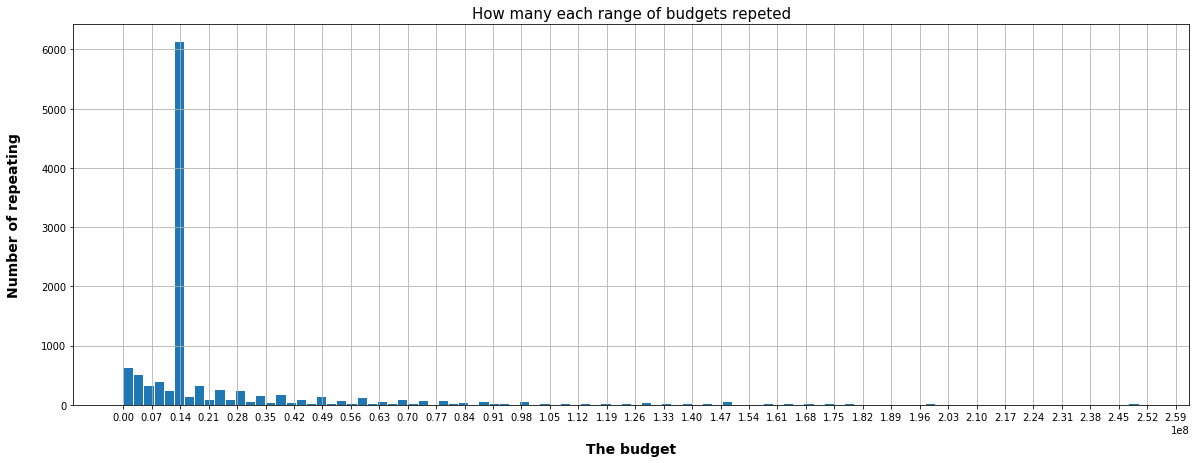

In [77]:
# Draw  a histogram to see most common budget
tmdb_df_clean.budget.sort_values()[:10856].hist(bins=100, figsize=(20,7),rwidth=0.9);


plt.xticks(np.arange(0, 2.6e8, 0.07e8))

# Set title
plt.title("How many each range of budgets repeted", size=15)

# Set x-axis label
plt.ylabel("Number of repeating", labelpad=20, weight='bold', size=14)

# Set y-axis label
plt.xlabel("The budget", labelpad=20, weight='bold', size=14);

___________

### Research Question 2  (What kinds of properties are associated with movie with largest and smallest revenue?)

In [78]:
# Get max revenue movie properties
tmdb_df_clean.loc[tmdb_df_clean.revenue.idxmax]

id                                                                 019995
imdb_id                                                         tt0499549
popularity                                                        9.43277
budget                                                           2.37e+08
revenue                                                        2781505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
homepage                                      http://www.avatarmovie.com/
director                                                    James Cameron
tagline                                       Enter the World of Pandora.
keywords                culture clash|future|space war|space colony|so...
overview                In the 22nd century, a paraplegic Marine is di...
runtime                                                               162
genres                           Actio

Why this movie get the largest revenue?

May be because of the director

In [79]:
# Check James Cameron the director votes that are greater and less than the average
'Tim Burton has directed ' +\
str(tmdb_df_clean[(tmdb_df_clean.director == 'James Cameron') &
                  (tmdb_df_clean.vote_average > tmdb_df_clean.vote_average.mean())].shape[0])+\
' movies greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.director == 'James Cameron')
                                                       & (tmdb_df_clean.vote_average < tmdb_df_clean.vote_average.mean())].shape[0])+\
' less than the average'

'Tim Burton has directed 9 movies greater than average and 1 less than the average'

In [80]:
# Check James Cameron the director revenue that are greater and less than the average
'Tim Burton has directed ' +\
str(tmdb_df_clean[(tmdb_df_clean.director == 'James Cameron') &
                  (tmdb_df_clean.revenue > tmdb_df_clean.revenue.mean())].shape[0])+\
' movies have revenue greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.director == 'James Cameron')
                                                       & (tmdb_df_clean.revenue < tmdb_df_clean.revenue.mean())].shape[0])+\
' less than the average'

'Tim Burton has directed 7 movies have revenue greater than average and 3 less than the average'

In [81]:
# Weather this film has votes greater or less than the mean
7.1/tmdb_df_clean.vote_average.mean()

1.1883000762435756

In [82]:
# Check the budget is greater than the mean or less and by how many times
2.37e+08/tmdb_df_clean.budget.mean() 

10.568855827897906

The director's movie has directed movies that have votes greater than average more than votes that is less than average.<br>
And the revenue that is greater than average is more than the revenue that is less than the average.</br>
However, the budget is about 10 times the mean and this budget according to the previous graph it is not common.



Let's check the casts

In [83]:
# Check the casts' movies to see how many films he has achieved greater and less than the average
for cast in tmdb_df_clean.loc[tmdb_df_clean.revenue.idxmax].cast.split('|'):
    print(cast + ' gets ' +\
    str(tmdb_df_clean[(tmdb_df_clean.cast.str.find(cast)!=-1) &  (tmdb_df_clean.cast.notnull())
                      & (tmdb_df_clean.vote_average > tmdb_df_clean.vote_average.mean())].shape[0])+\
    ' movies greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.cast.str.find(cast)!=-1) &  (tmdb_df_clean.cast.notnull())
                                                  & (tmdb_df_clean.vote_average < tmdb_df_clean.vote_average.mean())].shape[0])+\
    ' less than the average')

Sam Worthington gets 7 movies greater than average and 8 less than the average
Zoe Saldana gets 12 movies greater than average and 7 less than the average
Sigourney Weaver gets 25 movies greater than average and 8 less than the average
Stephen Lang gets 4 movies greater than average and 12 less than the average
Michelle Rodriguez gets 9 movies greater than average and 8 less than the average


Most casts have movie's votes greater than average more than less than average

In [84]:
# Check the genres' movies to see how many films he has achieved greater and less than the average
for cast in tmdb_df_clean.loc[tmdb_df_clean.revenue.idxmax].genres.split('|'):
    print(cast + ' gets ' +\
    str(tmdb_df_clean[(tmdb_df_clean.cast.str.find(cast)!=-1) & (tmdb_df_clean.vote_average > tmdb_df_clean.vote_average.mean())].shape[0])+\
    ' movies greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.cast.str.find(cast)!=-1) & (tmdb_df_clean.vote_average < tmdb_df_clean.vote_average.mean())].shape[0])+\
    ' less than the average')

Action gets 66 movies greater than average and 10 less than the average
Adventure gets 66 movies greater than average and 10 less than the average
Fantasy gets 66 movies greater than average and 10 less than the average
Science Fiction gets 66 movies greater than average and 10 less than the average


Most genres have movie's votes greater than average more than less than average

In [85]:
# Check runtime that is equal to 162 and has votes that are greater and less than the average
'The movie that equals 162 min have ' +\
str(tmdb_df_clean[(tmdb_df_clean.runtime == 162) &
                  (tmdb_df_clean.vote_average > tmdb_df_clean.vote_average.mean())].shape[0])+\
' movies greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.runtime == 162)
                                                       & (tmdb_df_clean.vote_average < tmdb_df_clean.vote_average.mean())].shape[0])+\
' less than the average'

'The movie that equals 162 min have 7 movies greater than average and 1 less than the average'

Also the director could choose a very suitable duration

In [86]:
# Get min revenue movie properties
tmdb_df_clean.loc[tmdb_df_clean.revenue.idxmin]

id                                                                 265208
imdb_id                                                         tt2231253
popularity                                                        2.93234
budget                                                              3e+07
revenue                                                                 0
original_title                                                  Wild Card
cast                    Jason Statham|Michael Angarano|Milo Ventimigli...
homepage                                                              NaN
director                                                       Simon West
tagline                       Never bet against a man with a killer hand.
keywords                                        gambling|bodyguard|remake
overview                When a Las Vegas bodyguard with lethal skills ...
runtime                                                                92
genres                                

May be because of the director

In [87]:
# Check Simon West the director votes that are greater and less than the average
'Simon West has directed ' +\
str(tmdb_df_clean[(tmdb_df_clean.director == 'Simon West') &
                  (tmdb_df_clean.vote_average > tmdb_df_clean.vote_average.mean())].shape[0])+\
' movies greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.director == 'Simon West')
                                                       & (tmdb_df_clean.vote_average < tmdb_df_clean.vote_average.mean())].shape[0])+\
' less than the average'

'Simon West has directed 3 movies greater than average and 5 less than the average'

In [88]:
# Check James Cameron the director revenue that are greater and less than the average
'Simon West has directed ' +\
str(tmdb_df_clean[(tmdb_df_clean.director == 'Simon West') & 
                  (tmdb_df_clean.revenue > tmdb_df_clean.revenue.mean())].shape[0])+\
' movies have revenue greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.director == 'James Cameron') 
                                                       & (tmdb_df_clean.revenue < tmdb_df_clean.revenue.mean())].shape[0])+\
' less than the average'

'Simon West has directed 6 movies have revenue greater than average and 3 less than the average'

In [89]:
# Weather this film has votes greater or less than the mean
5.3/tmdb_df_clean.vote_average.mean()

0.8870409019846409

Although the revenue is zero and that may be a typo, but I think that this is not a typo because the director has movie that have low rating more than that have high rating.
But he has movies' revenue that is greater than average more than that is less than average. So, It still may be a typo, let's check the casts

In [90]:
# Check the casts' movies to see how many films he has achieved greater and less than the average
for cast in tmdb_df_clean.loc[tmdb_df_clean.revenue.idxmin].cast.split('|'):
    print(cast + ' gets ' +\
    str(tmdb_df_clean[(tmdb_df_clean.cast.str.find(cast)!=-1) &  (tmdb_df_clean.cast.notnull())
                      & (tmdb_df_clean.vote_average > tmdb_df_clean.vote_average.mean())].shape[0])+\
    ' movies greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.cast.str.find(cast)!=-1) &  (tmdb_df_clean.cast.notnull())
                                                & (tmdb_df_clean.vote_average < tmdb_df_clean.vote_average.mean())].shape[0])+\
    ' less than the average')

Jason Statham gets 19 movies greater than average and 13 less than the average
Michael Angarano gets 7 movies greater than average and 8 less than the average
Milo Ventimiglia gets 1 movies greater than average and 9 less than the average
Dominik GarcÃ­a-Lorido gets 2 movies greater than average and 1 less than the average
Anne Heche gets 6 movies greater than average and 10 less than the average


He couldn't choose the casts well as most of them have rating for movies that they cast in it that have low votes_average 

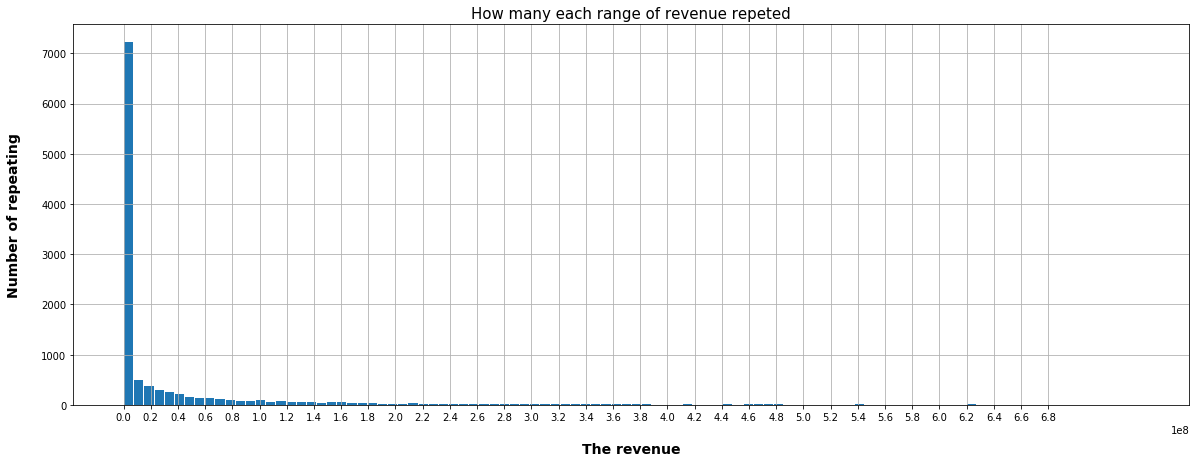

In [91]:
# Draw  a histogram to see most common revenue
tmdb_df_clean.revenue.sort_values()[:10800].hist(bins=100, figsize=(20,7),rwidth=0.9);

plt.xticks(np.arange(0, 7e8, 0.2e8))


# Set title
plt.title("How many each range of revenue repeted", size=15)

# Set x-axis label
plt.ylabel("Number of repeating", labelpad=20, weight='bold', size=14)

# Set y-axis label
plt.xlabel("The revenue", labelpad=20, weight='bold', size=14);

Most movie gets revenue less than 10<sup>8</sup>

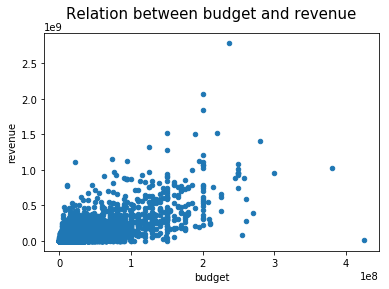

In [92]:
# Get the relation between budget and revenue using scatter plot
tmdb_df_clean.plot(kind='scatter', x='budget', y='revenue');

# Set title
plt.title("Relation between budget and revenue", size=15, pad=15);


The correlation says that as we increase the budget the revenue will increase, but that not always should be true as correlation does not mean causation.

### Research Question 3  (who is the most acting actor?)

In [93]:
# Get the actor with highest acting
actor_dict=dict()
for cast in tmdb_df_clean.cast:
    for actor in str(cast).split('|'):
        if actor != 'nan':
            actor_dict[actor] = actor_dict.get(actor, 0) + 1


In [94]:
# Sort the dict by value to see who is the actor with highest acting
sorted(actor_dict.items(), key=lambda x:x[1], reverse=True)

[('Robert De Niro', 72),
 ('Samuel L. Jackson', 71),
 ('Bruce Willis', 62),
 ('Nicolas Cage', 61),
 ('Michael Caine', 53),
 ('Robin Williams', 51),
 ('John Cusack', 50),
 ('John Goodman', 49),
 ('Morgan Freeman', 49),
 ('Liam Neeson', 48),
 ('Susan Sarandon', 48),
 ('Alec Baldwin', 47),
 ('Julianne Moore', 47),
 ('Tom Hanks', 46),
 ('Johnny Depp', 46),
 ('Christopher Walken', 46),
 ('Gene Hackman', 46),
 ('Sylvester Stallone', 45),
 ('Dennis Quaid', 45),
 ('Willem Dafoe', 45),
 ('Ed Harris', 44),
 ('Meryl Streep', 44),
 ('Donald Sutherland', 44),
 ('Clint Eastwood', 44),
 ('Robert Downey Jr.', 43),
 ('Woody Harrelson', 43),
 ('Ewan McGregor', 43),
 ('Keanu Reeves', 43),
 ('Antonio Banderas', 43),
 ('Harrison Ford', 42),
 ('Anthony Hopkins', 42),
 ('Nicole Kidman', 42),
 ('Danny Glover', 42),
 ('Eddie Murphy', 42),
 ('Steve Buscemi', 41),
 ('James Franco', 41),
 ('Al Pacino', 41),
 ('John Travolta', 41),
 ('Dustin Hoffman', 41),
 ('Christian Slater', 40),
 ('Jean-Claude Van Damme', 40),

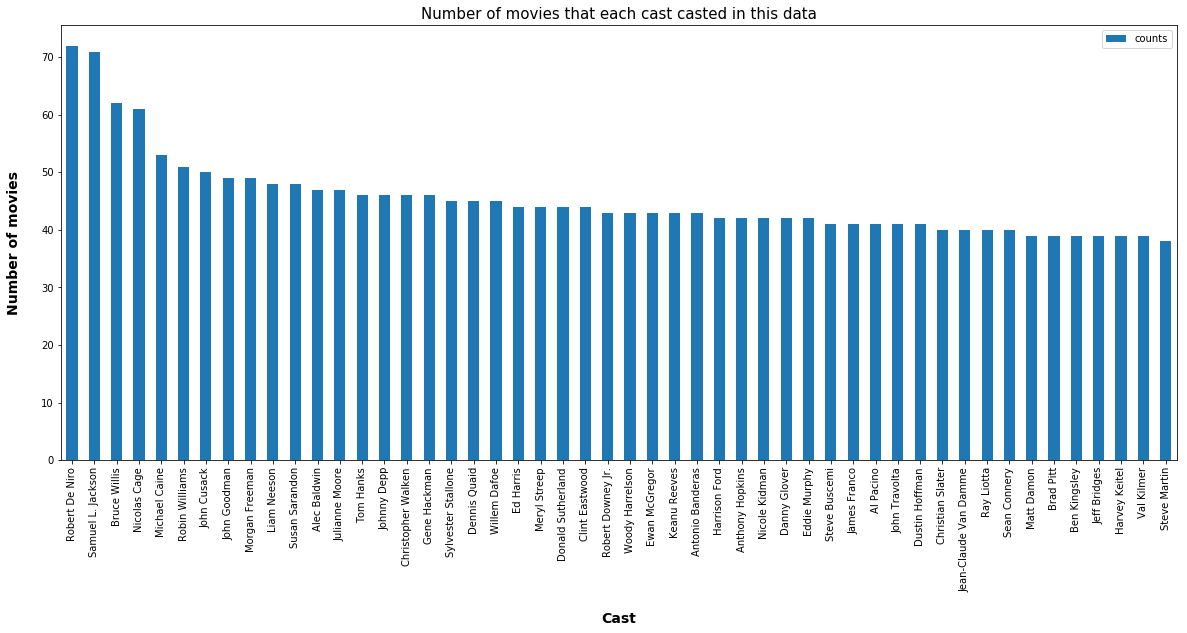

In [95]:
# Let's see it visually
pd.DataFrame(sorted(actor_dict.items(), key=lambda x:x[1], reverse=True)[:50]).rename(columns={0:"name", 1:'counts'}).set_index("name").plot(kind="bar", figsize=(20,8));

# Set title
plt.title("Number of movies that each cast casted in this data", size=15)

# Set x-axis label
plt.ylabel("Number of movies", labelpad=20, weight='bold', size=14)

# Set y-axis label
plt.xlabel("Cast", labelpad=20, weight='bold', size=14);

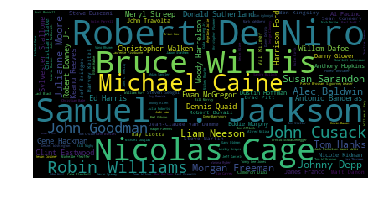

In [96]:
# Let's visualize the most acting actors
cloud_actor = wordcloud.WordCloud()
cloud_actor.generate_from_frequencies(actor_dict)
plt.imshow(cloud_actor.to_array(), interpolation = 'nearest')
plt.axis('off')
plt.show()


In [97]:
tmdb_df_clean[(tmdb_df_clean.cast.str.find('Robert De Niro')!=-1) & (tmdb_df_clean.cast.notnull())]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,imdb_url
51,257211,tt2361509,2.814802,3.500000e+07,194564672,The Intern,Robert De Niro|Anne Hathaway|Rene Russo|Anders...,http://www.theinternmovie.com/,Nancy Meyers,Experience never gets old,...,70-year-old widower Ben Whittaker has discover...,121,Comedy,Waverly Films|Warner Bros.,2015-09-24,1255,7.1,3.219999e+07,1.789994e+08,https://www.imdb.com/title/tt2361509
53,274479,tt2446980,2.793297,6.000000e+07,101134059,Joy,Jennifer Lawrence|Bradley Cooper|Robert De Nir...,http://www.foxmovies.com/movies/joy,David O. Russell,NaN,...,A story based on the life of a struggling Long...,124,Comedy|Drama,Fox 2000 Pictures|Davis Entertainment|Annapurn...,2015-12-24,1001,6.4,5.519998e+07,9.304329e+07,https://www.imdb.com/title/tt2446980
109,336004,tt3276924,1.449072,8.900000e+06,50136,Heist,Jeffrey Dean Morgan|Robert De Niro|Kate Boswor...,NaN,Scott Mann,Never make a bet you can't afford to lose.,...,A father is without the means to pay for his d...,93,Crime|Action|Thriller,Emmett/Furla Films|Silver Plane Films|Mass Hys...,2015-11-13,233,5.4,8.187996e+06,4.612510e+04,https://www.imdb.com/title/tt3276924
494,361671,tt5227516,0.129455,1.462570e+07,0,Ellis,Robert De Niro,http://jr-art.net,JR,NaN,...,"Ellis, a fourteen-minute film directed by JR a...",14,Drama,Unframed USA,2015-10-04,15,7.2,0.000000e+00,0.000000e+00,https://www.imdb.com/title/tt5227516
572,365717,tt4016250,0.082569,1.462570e+07,0,The Audition,Leonardo DiCaprio|Brad Pitt|Robert De Niro|Mar...,NaN,Martin Scorsese,A short film with big egos.,...,A short film promoting the opening of Melco-Cr...,16,Comedy,RatPac Entertainment|Melco-Crown Entertainment...,2015-10-27,10,6.1,0.000000e+00,0.000000e+00,https://www.imdb.com/title/tt4016250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,010433,tt0107473,0.665973,1.462570e+07,11081586,Mad Dog and Glory,Robert De Niro|Uma Thurman|Bill Murray|David C...,NaN,John McNaughton,A cop who'd rather be an artist. A mobster who...,...,Wayne Dobie is a shy cop whose low-key demeano...,96,Comedy|Crime|Romance|Drama,Universal Pictures|Mad Dog Productions,1993-03-05,25,5.3,0.000000e+00,1.672732e+07,https://www.imdb.com/title/tt0107473
10272,008092,tt0108330,0.639453,1.462570e+07,4104962,This Boyâ€™s Life,Robert De Niro|Leonardo DiCaprio|Ellen Barkin|...,NaN,Michael Caton-Jones,A true story based on the award-winning book b...,...,"In 1957, a son and mother flee the East and an...",115,Drama,Warner Bros.|Knickerbocker Films,1993-04-09,85,6.7,0.000000e+00,6.196317e+06,https://www.imdb.com/title/tt0108330
10507,011416,tt0091530,0.546365,2.450000e+07,17218023,The Mission,Robert De Niro|Jeremy Irons|Ray McAnally|Aidan...,NaN,Roland JoffÃ©,NaN,...,Jeremy Irons plays a Spanish Jesuit who goes i...,126,Adventure|Drama|Action|History,Goldcrest Films International|AMLF|Warner Bros...,1986-09-29,127,6.8,4.874046e+07,3.425365e+07,https://www.imdb.com/title/tt0091530
10596,000203,tt0070379,1.087374,5.000000e+05,3000000,Mean Streets,Harvey Keitel|Robert De Niro|David Proval|Amy ...,NaN,Martin Scorsese,You don't make up for your sins in church. You...,...,"A small-time hood must choose from among love,...",110,Drama|Crime,Scorsese Productions,1973-10-02,141,7.1,2.455580e+06,1.473348e+07,https://www.imdb.com/title/tt0070379


In [98]:
# Check Robert De Niro  movies to see how many films he has achieved greater and less than the average
'Robert De Niro gets ' +\
str(tmdb_df_clean[(tmdb_df_clean.cast.str.find('Robert De Niro')!=-1) &  (tmdb_df_clean.cast.notnull()) 
                        & (tmdb_df_clean.vote_average > tmdb_df_clean.vote_average.mean())].shape[0])+\
' movies greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.cast.str.find('Robert De Niro')!=-1) &  (tmdb_df_clean.cast.notnull())
                                                       & (tmdb_df_clean.vote_average < tmdb_df_clean.vote_average.mean())].shape[0])+\
' less than the average'

'Robert De Niro gets 49 movies greater than average and 23 less than the average'

What genre that Robert prefers

In [99]:
# Get the count of the movies' genres that Robert cast in it
d={}
robert = tmdb_df_clean[(tmdb_df_clean.cast.str.find('Robert De Niro')!=-1) &  (tmdb_df_clean.cast.notnull()) ]
for genre in robert.genres:
    for g in str(genre).split('|'):
        d[g] = d.get(g, 0) + 1

In [100]:
# Sort the dict by value to see who is the actor with highest acting
sorted(d.items(), key=lambda x:x[1], reverse=True)

[('Drama', 42),
 ('Comedy', 27),
 ('Crime', 26),
 ('Thriller', 21),
 ('Action', 17),
 ('Romance', 11),
 ('Adventure', 7),
 ('Mystery', 7),
 ('Science Fiction', 4),
 ('Horror', 4),
 ('Family', 3),
 ('Animation', 2),
 ('History', 2),
 ('Music', 1),
 ('Fantasy', 1),
 ('War', 1)]

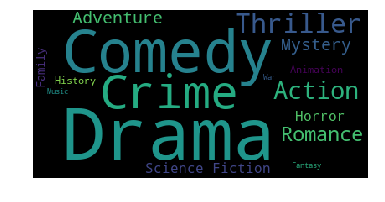

In [101]:
# Let's visualize the genre with most acting 
cloud_genre = wordcloud.WordCloud()
cloud_genre.generate_from_frequencies(d)
plt.imshow(cloud_genre.to_array(), interpolation = 'nearest')
plt.axis('off')
plt.show()

Robert De Niro most favorite genres are Drama then Comedy then Crime, this is may be because these genres are most popular genres.

### Research Question 4  (What kinds of properties are associated with the movie with largest cast?)

In [102]:
# Copy the cleaned data
count_casts = tmdb_df_clean.copy()

In [103]:
# Make new column with the number of genres in it
count_casts["count_cast"] = count_casts.cast.str.split('|').str.len()

In [104]:
count_casts.iloc[count_casts.count_cast.idxmax()]

id                                                                 135397
imdb_id                                                         tt0369610
popularity                                                        32.9858
budget                                                            1.5e+08
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
homepage                                    http://www.jurassicworld.com/
director                                                  Colin Trevorrow
tagline                                                 The park is open.
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
overview                Twenty-two years after the events of Jurassic ...
runtime                                                               124
genres                          Action

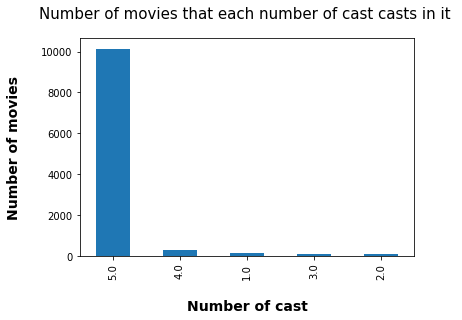

In [105]:
# Number of movies for each number of casts
count_casts.count_cast.value_counts().plot(kind="bar");

# Set title
plt.title("Number of movies that each number of cast casts in it ", size=15, pad=20)

# Set x-axis label
plt.ylabel("Number of movies", labelpad=20, weight='bold', size=14)

# Set y-axis label
plt.xlabel("Number of cast", labelpad=20, weight='bold', size=14);

We can't get the properties of all that equals 5 but we can get the properties with max votes

In [106]:
count_casts.loc[count_casts[count_casts.count_cast==5].vote_average.idxmax()]

id                                                                 374430
imdb_id                                                         tt3973198
popularity                                                       0.129531
budget                                                        1.46257e+07
revenue                                                                 0
original_title                              Black Mirror: White Christmas
cast                    Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...
homepage                                                              NaN
director                                                    Carl Tibbetts
tagline                                                               NaN
keywords                artificial intelligence|confession|technology|...
overview                This feature-length special consists of three ...
runtime                                                                74
genres                      Drama|Horr

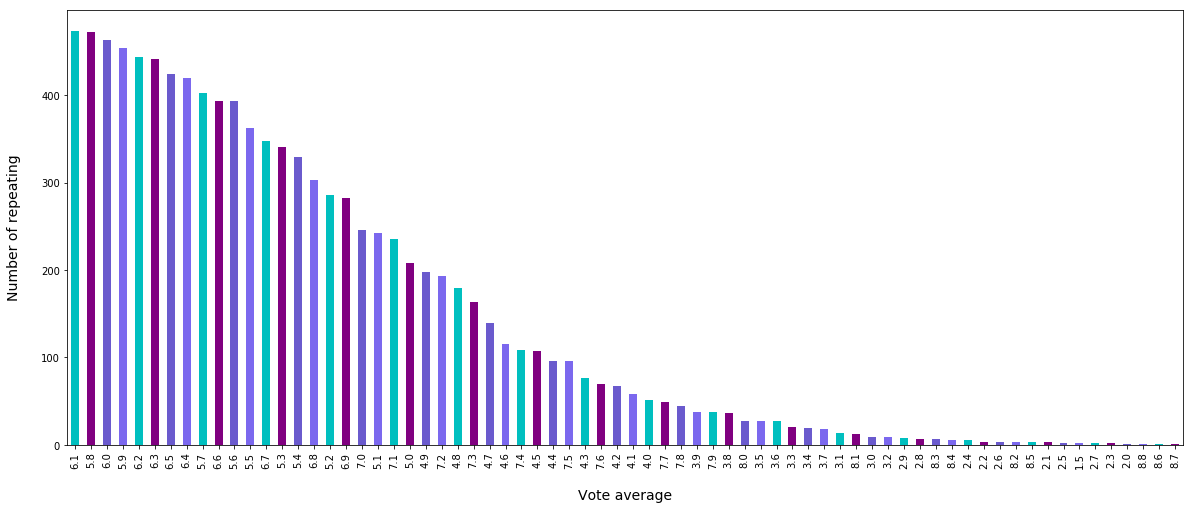

In [107]:
# Visualize the votes_average of movies that have 5 genres
count_casts[count_casts.count_cast==5].vote_average.value_counts().plot(kind="bar", figsize=(20,8), color=['c', 'purple', 'slateblue', 'mediumslateblue']);

# Set x-axis label
plt.ylabel("Number of repeating", labelpad=20, size=14)

# Set y-axis label
plt.xlabel("Vote average", labelpad=20, size=14);


In [108]:
# How many cast to get higher votes
for i in range(1,6):
    print(str(i) + ' casts gets ' + str(count_casts[(count_casts.count_cast==i) & (~count_casts.cast.isna()) &
             (count_casts.vote_average>count_casts.vote_average.mean())].shape[0])+\
          ' greater than average')
          


1 casts gets 135 greater than average
2 casts gets 76 greater than average
3 casts gets 70 greater than average
4 casts gets 163 greater than average
5 casts gets 5300 greater than average


To get high votes choose from 5 casts

In [109]:
# How many cast to get higher revenue
for i in range(1,6):
    print(str(i) + ' casts gets ' + str(count_casts[(count_casts.count_cast==i) & (~count_casts.cast.isna()) &
             (count_casts.revenue>count_casts.revenue.mean())].shape[0])+\
          ' revenues greater than average')
          


1 casts gets 0 revenues greater than average
2 casts gets 0 revenues greater than average
3 casts gets 0 revenues greater than average
4 casts gets 2 revenues greater than average
5 casts gets 2168 revenues greater than average


Also, To get high revenue choose from 5 casts

Most films have 5 casts, may be because it helps to get high votes and revenues or may be high votes and revenues associated with 5 casts because most of movies have 5 cast.

### Research Question 5  (Who is the most directed director?)

In [110]:
# Get the movies' counts for each director 
director_dict=dict()
for directors in tmdb_df_clean.director:
    if type(directors) is str:
        for director in directors.split('|'):            
            director_dict[director] = director_dict.get(director, 0) + 1


In [111]:
# Sort the dict by value to see who is the director with highest directing
sorted(director_dict.items(), key=lambda x:x[1], reverse=True)

[('Woody Allen', 46),
 ('Clint Eastwood', 34),
 ('Martin Scorsese', 31),
 ('Steven Spielberg', 30),
 ('Ridley Scott', 23),
 ('Steven Soderbergh', 23),
 ('Ron Howard', 22),
 ('Joel Schumacher', 21),
 ('Tim Burton', 20),
 ('Brian De Palma', 20),
 ('Barry Levinson', 19),
 ('Robert Rodriguez', 19),
 ('David Cronenberg', 19),
 ('Wes Craven', 19),
 ('Francis Ford Coppola', 19),
 ('John Carpenter', 19),
 ('Rob Reiner', 18),
 ('John Landis', 18),
 ('Mike Nichols', 18),
 ('Walter Hill', 18),
 ('Robert Zemeckis', 17),
 ('Spike Lee', 17),
 ('Stephen Frears', 17),
 ('Renny Harlin', 17),
 ('Tyler Perry', 17),
 ('Joel Coen', 17),
 ('Peter Hyams', 17),
 ('Roman Polanski', 17),
 ('Oliver Stone', 17),
 ('Norman Jewison', 17),
 ('Sidney Lumet', 17),
 ('Richard Linklater', 16),
 ('Uwe Boll', 16),
 ('David Lynch', 16),
 ('Tony Scott', 16),
 ('Stephen Herek', 16),
 ('Gus Van Sant', 16),
 ('Richard Donner', 16),
 ('Blake Edwards', 16),
 ('Ivan Reitman', 15),
 ('Robert Altman', 15),
 ('Neil Jordan', 15),
 ('

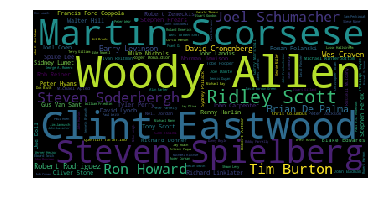

In [112]:
# Let's visualize the directors' counts 
cloud_dir = wordcloud.WordCloud()
cloud_dir.generate_from_frequencies(director_dict)
plt.imshow(cloud_dir.to_array(), interpolation = 'nearest')
plt.axis('off')
plt.show()

In [113]:
tmdb_df_clean[(tmdb_df_clean.director.str.find('Woody Allen')!=-1) & (tmdb_df_clean.director.notnull())]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,imdb_url
155,282984,tt3715320,1.007054,1.100000e+07,27391084,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Park...,http://www.sonyclassics.com/irrationalman/,Woody Allen,NaN,...,"On a small town college campus, a philosophy p...",95,Mystery|Drama,Sony Pictures|Gravier Productions,2015-07-17,319,6.1,1.012000e+07,2.519979e+07,https://www.imdb.com/title/tt3715320
790,229297,tt2870756,0.889247,1.462570e+07,32339326,Magic in the Moonlight,Colin Firth|Emma Stone|Hamish Linklater|Marcia...,NaN,Woody Allen,NaN,...,"Set in the 1920s French Riviera, a master magi...",97,Comedy|Drama|Romance,Perdido Productions|Harbor Picture Company,2014-07-25,464,6.3,0.000000e+00,2.978746e+07,https://www.imdb.com/title/tt2870756
1332,000703,tt0075686,1.179653,4.000000e+06,38251425,Annie Hall,Woody Allen|Diane Keaton|Tony Roberts|Carol Ka...,NaN,Woody Allen,A nervous romance.,...,"In the city of New York, comedian Alvy Singer ...",93,Comedy|Drama|Romance,United Artists,1977-04-19,493,7.6,1.439112e+07,1.376203e+08,https://www.imdb.com/title/tt0075686
1489,019265,tt1178663,0.804857,1.500000e+07,0,Whatever Works,Larry David|Evan Rachel Wood|Adam Brooks|Micha...,http://www.sonypictures.com/classics/whateverw...,Woody Allen,A new comedy,...,Whatever Works explores the relationship betwe...,92,Comedy|Romance,Sony Pictures Classics|Wild Bunch|Gravier Prod...,2009-06-19,174,6.7,1.524601e+07,0.000000e+00,https://www.imdb.com/title/tt1178663
2126,038031,tt1182350,0.493121,2.200000e+07,0,You Will Meet a Tall Dark Stranger,Naomi Watts|Josh Brolin|Antonio Banderas|Ewen ...,NaN,Woody Allen,NaN,...,Two married couples find only trouble and hear...,98,Comedy|Drama|Romance,Antena 3 Films,2010-05-23,131,5.8,2.200000e+07,0.000000e+00,https://www.imdb.com/title/tt1182350
2551,009684,tt0158371,0.281948,1.462570e+07,0,Sweet and Lowdown,Woody Allen|Ben Duncan|Daniel Okrent|Dan Moran...,NaN,Woody Allen,NaN,...,A comedic biopic focused on the life of fictio...,95,Comedy|Drama,Sweetland Films|Magnolia Productions,1999-12-03,48,6.5,0.000000e+00,0.000000e+00,https://www.imdb.com/title/tt0158371
2744,002779,tt0256524,0.446532,1.462570e+07,0,The Curse of the Jade Scorpion,Woody Allen|Helen Hunt|John Tormey|John Schuck...,NaN,Woody Allen,Love stings.,...,"CW Briggs is a veteran insurance investigator,...",103,Comedy|Crime|Mystery|Romance|Thriller,DreamWorks SKG|Gravier Productions,2001-08-05,77,6.1,0.000000e+00,0.000000e+00,https://www.imdb.com/title/tt0256524
2964,005038,tt0497465,0.866771,1.500000e+07,96408652,Vicky Cristina Barcelona,Scarlett Johansson|Rebecca Hall|Javier Bardem|...,NaN,Woody Allen,Life is the ultimate work of art,...,Two girlfriends on a summer holiday in Spain b...,96,Drama|Romance,The Weinstein Company|Gravier Productions|Ante...,2008-08-15,563,6.7,1.519180e+07,9.764139e+07,https://www.imdb.com/title/tt0497465
3429,059436,tt1605783,1.367727,3.000000e+07,151119219,Midnight in Paris,Owen Wilson|Rachel McAdams|Kurt Fuller|Mimi Ke...,http://www.sonyclassics.com/midnightinparis,Woody Allen,NaN,...,A romantic comedy about a family traveling to ...,94,Fantasy|Comedy|Romance,Gravier Productions|TelevisiÃ³ de Catalunya (T...,2011-05-11,1117,7.2,2.908194e+07,1.464947e+08,https://www.imdb.com/title/tt1605783
4046,009689,tt0278823,0.444428,1.600000e+07,0,Hollywood Ending,Woody Allen|George Hamilton|TÃ©a Leoni|Debra M...,NaN,Woody Allen,It's going to be a shot in the dark!,...,"Woody Allen stars as Val Waxman, a two-time Os...",112,Comedy|Drama,DreamWorks SKG,2002-05-03,54,6.2,1.939618e+07,0.000000e+00,https://www.imdb.com/title/tt0278823


In [114]:
# Check Woody Allen's  movies to see how many films he has achieved votes greater and less than the average
'Woody Allen gets ' +\
str(tmdb_df_clean[(tmdb_df_clean.director.str.find('Woody Allen')!=-1) &  (tmdb_df_clean.cast.notnull()) 
                        & (tmdb_df_clean.vote_average > tmdb_df_clean.vote_average.mean())].shape[0])+\
' movies greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.director.str.find('Woody Allen')!=-1) &  (tmdb_df_clean.director.notnull())
                                                       & (tmdb_df_clean.vote_average < tmdb_df_clean.vote_average.mean())].shape[0])+\
' less than the average'

'Woody Allen gets 67 movies greater than average and 11 less than the average'

In [115]:
# Check Woody Allen's  movies to see how many films he has achieved revenue greater and less than the average
'Woody Allen gets ' +\
str(tmdb_df_clean[(tmdb_df_clean.director.str.find('Woody Allen')!=-1) &  (tmdb_df_clean.cast.notnull()) 
                        & (tmdb_df_clean.revenue > tmdb_df_clean.revenue.mean())].shape[0])+\
' movies have revenues greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.director.str.find('Woody Allen')!=-1) &  (tmdb_df_clean.director.notnull())
                                                       & (tmdb_df_clean.revenue < tmdb_df_clean.revenue.mean())].shape[0])+\
' less than the average'

'Woody Allen gets 7 movies have revenues greater than average and 39 less than the average'

In [116]:
# Get the count of the movies' genres that Woody cast in it
dd={}
robert = tmdb_df_clean[(tmdb_df_clean.director.str.find('Woody Allen')!=-1) &  (tmdb_df_clean.director.notnull()) ]
for genre in robert.genres:
    for g in str(genre).split('|'):
        dd[g] = dd.get(g, 0) + 1

In [117]:
sorted(dd.items(),key=lambda x:x[1])

[('History', 1),
 ('Science Fiction', 1),
 ('Fantasy', 2),
 ('Action', 3),
 ('Mystery', 4),
 ('Crime', 6),
 ('Thriller', 6),
 ('Romance', 21),
 ('Drama', 25),
 ('Comedy', 39)]

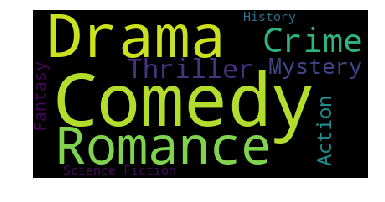

In [118]:
# Let's visualize the genre with most acting 
cloud_genre_dir = wordcloud.WordCloud()
cloud_genre_dir.generate_from_frequencies(dd)
plt.imshow(cloud_genre_dir.to_array(), interpolation = 'nearest')
plt.axis('off')
plt.show()

Also, comedy and Drama get the first places

Most directed director is Woody Allen, he is a successful director, most of his movie got more than the average.
His most favorite genre is Drama and comedy also and also this is may be because they are most popular genres but he most of his movies get revenue less than average, this may seem that Woody is care more about votes rather than revenues .i.e he prefer quality to quantity.

### Research Question 6  (What are the most repeated keywords?)

In [119]:
# Get the count of the movies' keywords in the data
key={}
for keywords in tmdb_df_clean.keywords:
    for keyword in str(keywords).split('|'):
        if keyword !='nan':
            key[keyword] = key.get(keyword, 0) + 1

In [120]:
# Sort the dictionary by the value from highest to lowest
sorted(key.items(),key=lambda x:x[1], reverse=True)

[('woman director', 413),
 ('independent film', 396),
 ('based on novel', 278),
 ('sex', 272),
 ('sport', 216),
 ('murder', 204),
 ('biography', 169),
 ('musical', 169),
 ('new york', 163),
 ('suspense', 159),
 ('nudity', 154),
 ('duringcreditsstinger', 152),
 ('female nudity', 149),
 ('prison', 140),
 ('dystopia', 137),
 ('revenge', 137),
 ('high school', 135),
 ('sequel', 130),
 ('london', 123),
 ('suicide', 115),
 ('friendship', 111),
 ('police', 103),
 ('holiday', 100),
 ('rape', 96),
 ('love', 96),
 ('detective', 93),
 ('world war ii', 91),
 ('father-son relationship', 90),
 ('gay', 88),
 ('teenager', 87),
 ('brother brother relationship', 85),
 ('robbery', 85),
 ('monster', 83),
 ('prostitute', 82),
 ('paris', 81),
 ('corruption', 81),
 ('serial killer', 80),
 ('secret', 79),
 ('vampire', 77),
 ('alien', 76),
 ('martial arts', 75),
 ('fight', 75),
 ('superhero', 73),
 ('england', 73),
 ('journalist', 73),
 ('aftercreditsstinger', 71),
 ('alcohol', 71),
 ('cia', 70),
 ('witch', 68

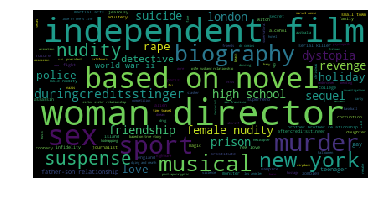

In [121]:
# Let's visualize the genre with most acting 
cloud_key = wordcloud.WordCloud()
cloud_key.generate_from_frequencies(key)
plt.imshow(cloud_key.to_array(), interpolation = 'nearest')
plt.axis('off')
plt.show()

### Research Question 7 (What kinds of properties are associated with longest movie?)

In [122]:
# See the movie with largest runtime
tmdb_df_clean.iloc[tmdb_df_clean.runtime.idxmax()]

id                                                                 150004
imdb_id                                                         tt0289830
popularity                                                       0.469332
budget                                                        1.46257e+07
revenue                                                                 0
original_title                                                      Taken
cast                    Dakota Fanning|Matt Frewer|Eric Close|Emily Be...
homepage                                                              NaN
director                Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...
tagline                       Some secrets we keep. Some are kept from us
keywords                                                              NaN
overview                Taken spans five decades and four generations,...
runtime                                                               877
genres                                

In [123]:
# Check if there are more than one have the largest runtime
tmdb_df_clean.loc[tmdb_df_clean.runtime==877]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,imdb_url
4041,150004,tt0289830,0.469332,1.462570e+07,0,Taken,Dakota Fanning|Matt Frewer|Eric Close|Emily Be...,NaN,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,Some secrets we keep. Some are kept from us,...,"Taken spans five decades and four generations,...",877,Science Fiction,DreamWorks,2002-12-02,38,6.8,0.0,0.0,https://www.imdb.com/title/tt0289830


In [124]:
# check if greater or less than the mean and by how much
tmdb_df_clean.iloc[tmdb_df_clean.runtime.idxmax()].vote_average/tmdb_df_clean.vote_average.mean()

1.1380902138670865

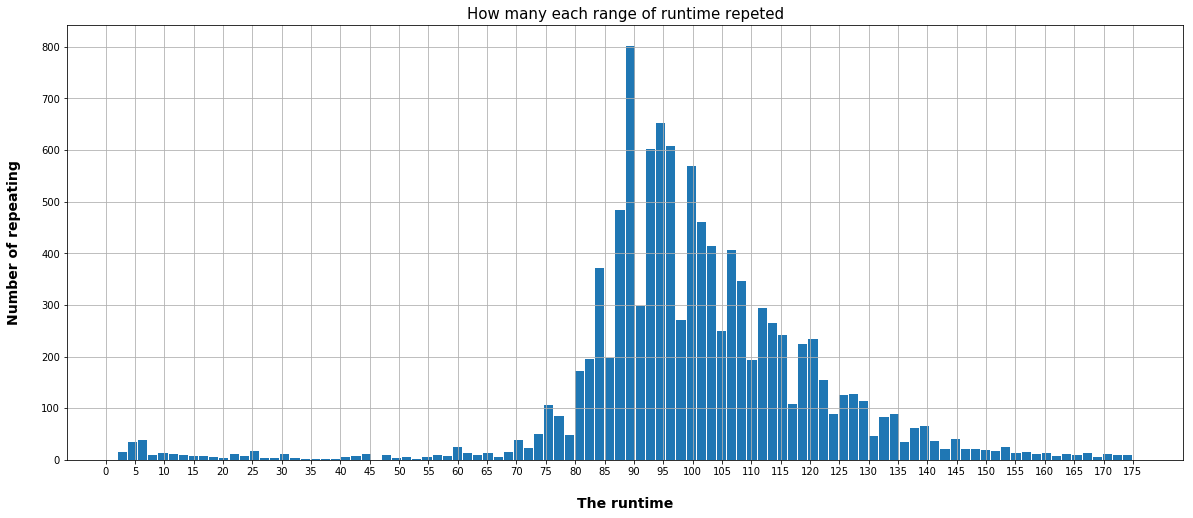

In [125]:
# Visualize the runtime
tmdb_df_clean.runtime.sort_values()[:10700].hist(bins=100, figsize=(20,8), rwidth=0.9);

# specify the range
plt.xticks(np.arange(0, 180, 5))

# Set title
plt.title("How many each range of runtime repeted", size=15)

# Set x-axis label
plt.ylabel("Number of repeating", labelpad=20, weight='bold', size=14)

# Set y-axis label
plt.xlabel("The runtime", labelpad=20, weight='bold', size=14);

 Most popular runtime is 90 minutes

### Research Question 8  (What kinds of properties are associated with movie with largest genre?)

In [126]:
# Copy the cleaned data
count_genres = tmdb_df_clean.copy()

In [127]:
# Make new column with the number of genres in it
count_genres["count_genre"] = count_genres.genres.str.split('|').str.len()

In [128]:
count_genres.iloc[count_genres.count_genre.idxmax()]

id                                                                 158852
imdb_id                                                         tt1964418
popularity                                                        5.46214
budget                                                            1.9e+08
revenue                                                         209035668
original_title                                               Tomorrowland
cast                    Britt Robertson|George Clooney|Raffey Cassidy|...
homepage                            http://movies.disney.com/tomorrowland
director                                                        Brad Bird
tagline                      Imagine a world where nothing is impossible.
keywords                         inventor|apocalypse|destiny|imax|dreamer
overview                Bound by a shared destiny, a bright, optimisti...
runtime                                                               130
genres                    Action|Famil

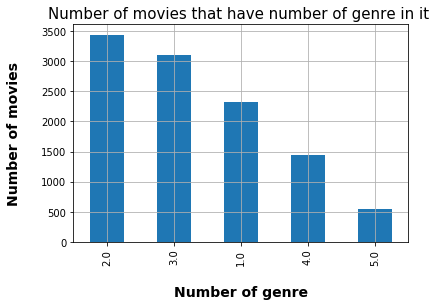

In [129]:
# Number of movies for each number of casts
count_genres.count_genre.value_counts().plot(kind="bar");
plt.grid(True)

# Set title
plt.title("Number of movies that have number of genre in it ", size=15)

# Set x-axis label
plt.ylabel("Number of movies", labelpad=20, weight='bold', size=14)

# Set y-axis label
plt.xlabel("Number of genre", labelpad=20, weight='bold', size=14);

We can't get the properties of all that equals 5 but we can get the properties with max votes

In [130]:
count_genres.loc[count_genres[count_genres.count_genre==5].vote_average.idxmax()]

id                                                                 374430
imdb_id                                                         tt3973198
popularity                                                       0.129531
budget                                                        1.46257e+07
revenue                                                                 0
original_title                              Black Mirror: White Christmas
cast                    Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...
homepage                                                              NaN
director                                                    Carl Tibbetts
tagline                                                               NaN
keywords                artificial intelligence|confession|technology|...
overview                This feature-length special consists of three ...
runtime                                                                74
genres                      Drama|Horr

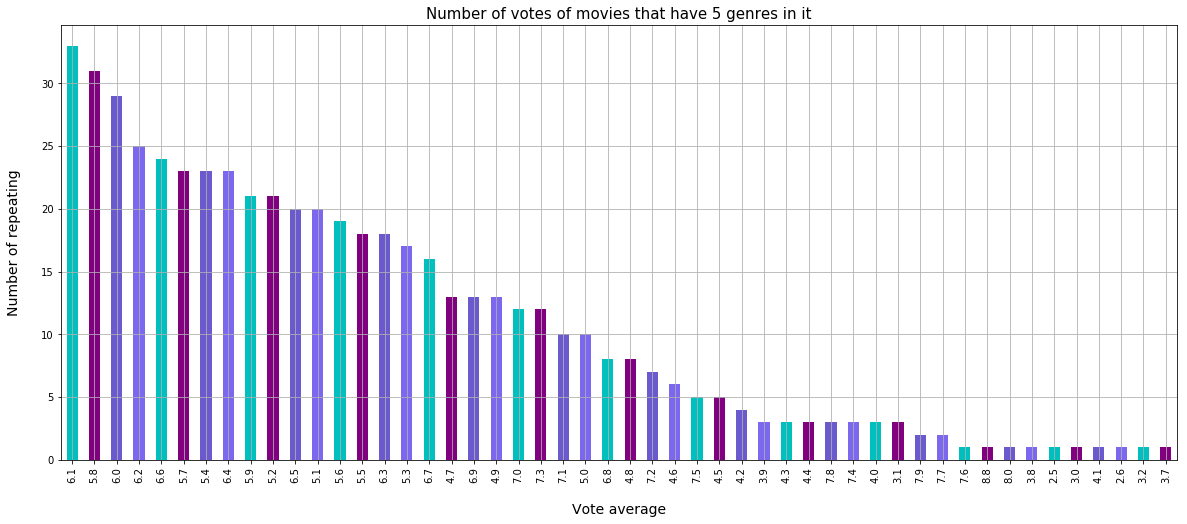

In [131]:
# Visualize the votes_average of movies that have 5 genres
count_genres[count_genres.count_genre==5].vote_average.value_counts().plot(kind="bar", figsize=(20,8), color=['c', 'purple', 'slateblue', 'mediumslateblue']);

plt.grid(True)

#Set title
plt.title("Number of votes of movies that have 5 genres in it", size=15)
# Set x-axis label
plt.ylabel("Number of repeating", labelpad=20, size=14)

# Set y-axis label
plt.xlabel("Vote average", labelpad=20, size=14);


In [132]:
# How many genre to get higher votes
for i in range(1,6):
    print(str(i) + ' genres get ' + str(count_genres[(count_genres.count_genre==i) & (~count_genres.genres.isna()) &
             (count_genres.vote_average>count_genres.vote_average.mean())].shape[0])+\
          ' greater than average')
          


1 genres get 1287 greater than average
2 genres get 1801 greater than average
3 genres get 1664 greater than average
4 genres get 775 greater than average
5 genres get 268 greater than average


To get high votes choose from 2-3 genres only

In [133]:
# How many genre to get higher revenue
for i in range(1,6):
    print(str(i) + ' genres get ' + str(count_genres[(count_genres.count_genre==i) & (~count_genres.genres.isna()) &
             (count_genres.revenue>count_genres.revenue.mean())].shape[0])+\
          ' revenues greater than average')
          


1 genres get 331 revenues greater than average
2 genres get 540 revenues greater than average
3 genres get 750 revenues greater than average
4 genres get 387 revenues greater than average
5 genres get 162 revenues greater than average


Also, To get high revenue choose from 2-3 genres only

### Research Question 9  (What is the most repeated genre?)

In [134]:
# Get the movies' counts for each genre 
genre_dict=dict()
for genres in tmdb_df_clean.genres:
    if type(genres) is str:
        for genre in genres.split('|'):            
            genre_dict[genre] = genre_dict.get(genre, 0) + 1


In [135]:
# Sort genre_dict by value
sorted(genre_dict.items(), key=lambda x:x[1], reverse=True)

[('Drama', 4761),
 ('Comedy', 3793),
 ('Thriller', 2908),
 ('Action', 2385),
 ('Romance', 1712),
 ('Horror', 1637),
 ('Adventure', 1471),
 ('Crime', 1355),
 ('Family', 1231),
 ('Science Fiction', 1230),
 ('Fantasy', 916),
 ('Mystery', 810),
 ('Animation', 699),
 ('Documentary', 520),
 ('Music', 408),
 ('History', 334),
 ('War', 270),
 ('Foreign', 188),
 ('TV Movie', 167),
 ('Western', 165)]

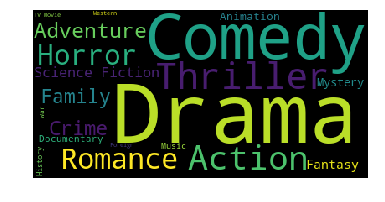

In [136]:
# Let's visualize the genre with most acting 
cloud_genre = wordcloud.WordCloud()
cloud_genre.generate_from_frequencies(genre_dict)
plt.imshow(cloud_genre.to_array(), interpolation = 'nearest')
plt.axis('off')
plt.show()

Most popular genres are drama and comedy, this may be a reason that most popular director and cast prefers they them

### Research Question 10  (Which genres are most popular from year to year?)

In [137]:
# Get the genres series only
selected_data = pd.DataFrame(tmdb_df_clean["genres"])

# Make new column with year only to make it the index 
# which we will use to count number of genres in each year
selected_data["year"] = tmdb_df_clean['release_date'].dt.year
selected_data=selected_data.set_index(['year'])

# See what we have just made
selected_data.head()

,genres
year,
2015,Action|Adventure|Science Fiction|Thriller
2015,Action|Adventure|Science Fiction|Thriller
2015,Adventure|Science Fiction|Thriller
2015,Action|Adventure|Science Fiction|Fantasy
2015,Action|Crime|Thriller


In [138]:
# Get the count of the movies' genres in the data
genre_yr_dict={}
for genres_yr in range(1966,2016):
    gnr_dict={}
    for genres in selected_data.loc[genres_yr].genres:
        if type(genres) is str:
            for genre in genres.split('|'):
                gnr_dict[genre]=gnr_dict.get(genre, 0) + 1
           
    genre_yr_dict[genres_yr] = gnr_dict


In [139]:
# Make a dataframe with count of each genre in the year 
genre_yr_df=pd.DataFrame(genre_yr_dict)

In [140]:
# See the dataframe
genre_yr_df

,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Animation,3.0,2.0,3.0,3.0,2,1.0,1.0,3.0,1.0,1.0,...,39,32,33,48.0,50,46,40,42.0,36.0,39.0
Family,7.0,3.0,5.0,4.0,3,2.0,2.0,4.0,4.0,2.0,...,65,45,56,60.0,55,72,42,48.0,43.0,44.0
Comedy,16.0,17.0,9.0,12.0,12,9.0,13.0,8.0,12.0,12.0,...,155,151,169,198.0,169,172,176,175.0,185.0,162.0
Drama,16.0,16.0,20.0,13.0,19,30.0,16.0,31.0,21.0,17.0,...,197,197,233,224.0,211,214,232,253.0,284.0,260.0
Science Fiction,6.0,4.0,4.0,3.0,3,6.0,4.0,6.0,5.0,11.0,...,30,41,52,71.0,46,56,54,61.0,62.0,86.0
Action,14.0,7.0,6.0,10.0,11,11.0,10.0,15.0,14.0,10.0,...,80,95,99,108.0,108,115,99,121.0,129.0,107.0
Adventure,11.0,7.0,5.0,5.0,6,5.0,5.0,5.0,8.0,8.0,...,55,60,63,72.0,59,62,50,67.0,67.0,69.0
Fantasy,2.0,3.0,5.0,2.0,3,2.0,1.0,1.0,3.0,4.0,...,34,47,43,49.0,44,46,34,39.0,36.0,33.0
Mystery,6.0,3.0,4.0,1.0,3,6.0,4.0,7.0,5.0,8.0,...,30,34,29,51.0,32,38,33,38.0,36.0,42.0
Thriller,8.0,5.0,5.0,3.0,5,17.0,10.0,16.0,20.0,13.0,...,114,125,127,157.0,135,146,160,175.0,179.0,171.0


In [141]:
# What is the most popular genre for years from 1966 to 2015
for genres_yr in range(1966,2016):
    print("Most popular genre in "+str(genres_yr)+" "+str(genre_yr_df[genres_yr].idxmax()))#.plot(kind="bar")

Most popular genre in 1966 Comedy
Most popular genre in 1967 Comedy
Most popular genre in 1968 Drama
Most popular genre in 1969 Drama
Most popular genre in 1970 Drama
Most popular genre in 1971 Drama
Most popular genre in 1972 Drama
Most popular genre in 1973 Drama
Most popular genre in 1974 Drama
Most popular genre in 1975 Drama
Most popular genre in 1976 Drama
Most popular genre in 1977 Drama
Most popular genre in 1978 Drama
Most popular genre in 1979 Drama
Most popular genre in 1980 Drama
Most popular genre in 1981 Drama
Most popular genre in 1982 Drama
Most popular genre in 1983 Drama
Most popular genre in 1984 Drama
Most popular genre in 1985 Comedy
Most popular genre in 1986 Drama
Most popular genre in 1987 Comedy
Most popular genre in 1988 Comedy
Most popular genre in 1989 Comedy
Most popular genre in 1990 Drama
Most popular genre in 1991 Drama
Most popular genre in 1992 Drama
Most popular genre in 1993 Drama
Most popular genre in 1994 Comedy
Most popular genre in 1995 Drama
Mos

Most genre either Drama or Comedy This may be because all of people love it or beacuse drama and comedy are the most repeated genres in this data I will recommed if we want to make a recommendation engine for movies will use comedy and drama movies as interface to any one who is the first time enter the website

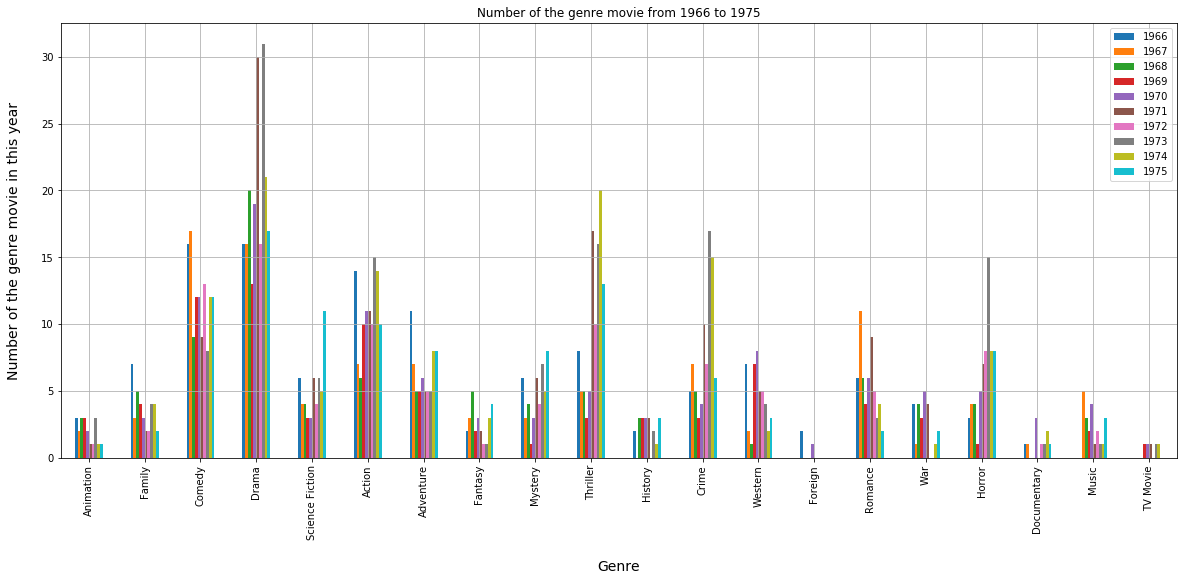

In [142]:
# Let's make some visualization for first 10 years
genre_yr_df[range(1966,1976)].plot(kind="bar", figsize=(20,8))
plt.grid(True);

#Set title
plt.title("Number of the genre movie from 1966 to 1975")
# Set x-axis label
plt.ylabel("Number of the genre movie in this year", labelpad=20, size=14)

# Set y-axis label
plt.xlabel("Genre", labelpad=20, size=14);


Number of drama movies is almost maximum from 66 to 76, it seems that most people in this era likes drama then comes the comedy movies.

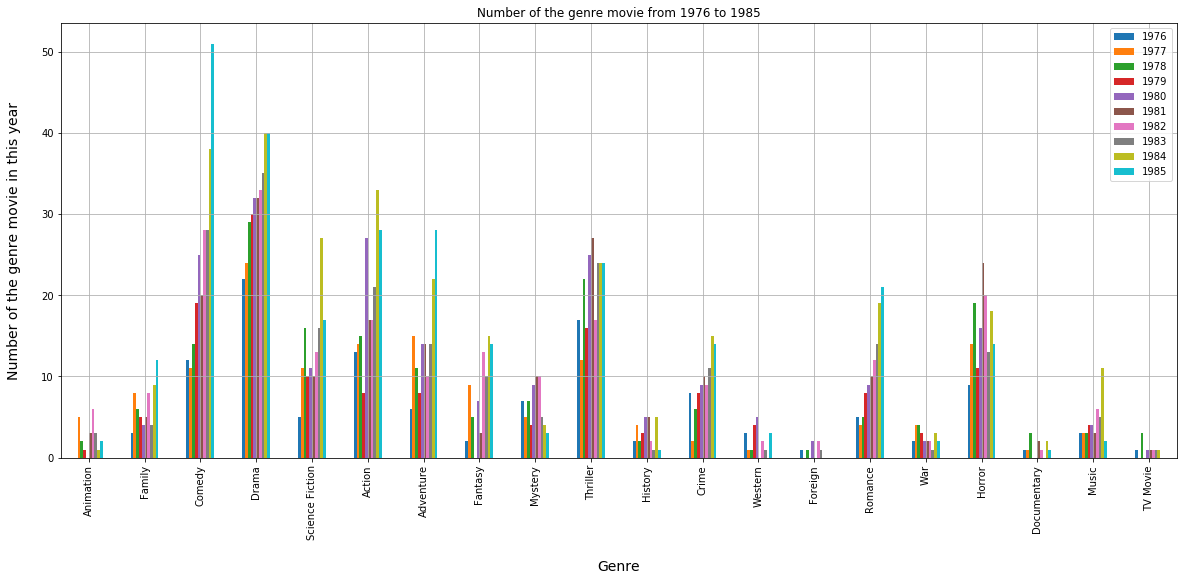

In [143]:
# Let's make some visualization for second 10 years
genre_yr_df[range(1976,1986)].plot(kind="bar", figsize=(20,8))
plt.grid(True);

#Set title
plt.title("Number of the genre movie from 1976 to 1985")
# Set x-axis label
plt.ylabel("Number of the genre movie in this year", labelpad=20, size=14)

# Set y-axis label
plt.xlabel("Genre", labelpad=20, size=14);


In this era comedy movies starts to increase, it seems that more people tends to watch it. So, directors directed more from it.

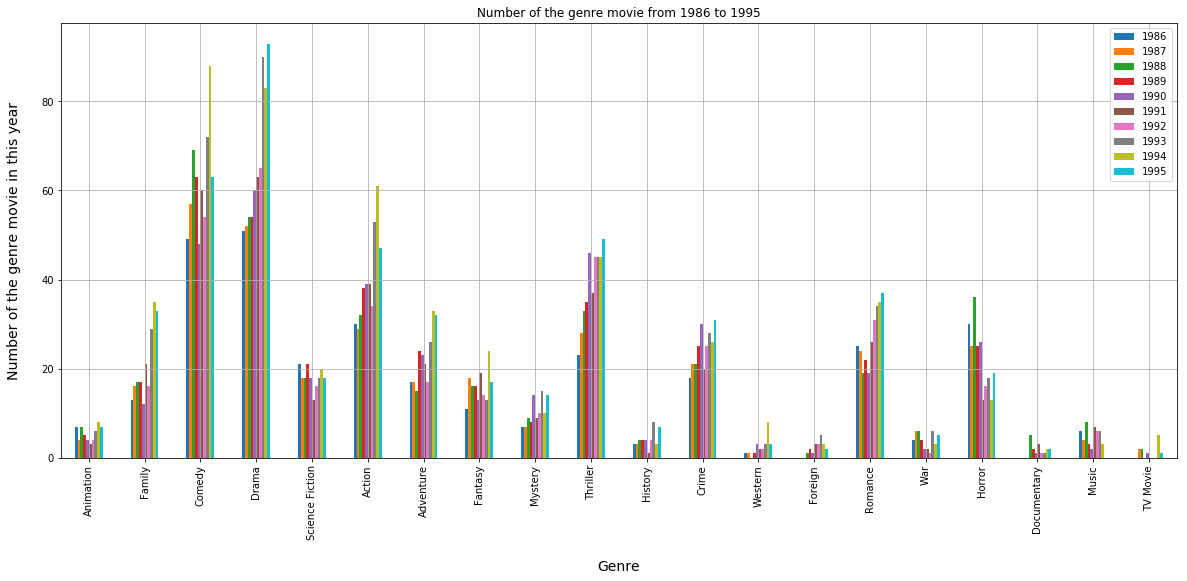

In [144]:
# Let's make some visualization for third 10 years
genre_yr_df[range(1986,1996)].plot(kind="bar", figsize=(20,8))
plt.grid(True);

#Set title
plt.title("Number of the genre movie from 1986 to 1995")
# Set x-axis label
plt.ylabel("Number of the genre movie in this year", labelpad=20, size=14)

# Set y-axis label
plt.xlabel("Genre", labelpad=20, size=14);


Drama back to increase as well as comedy.

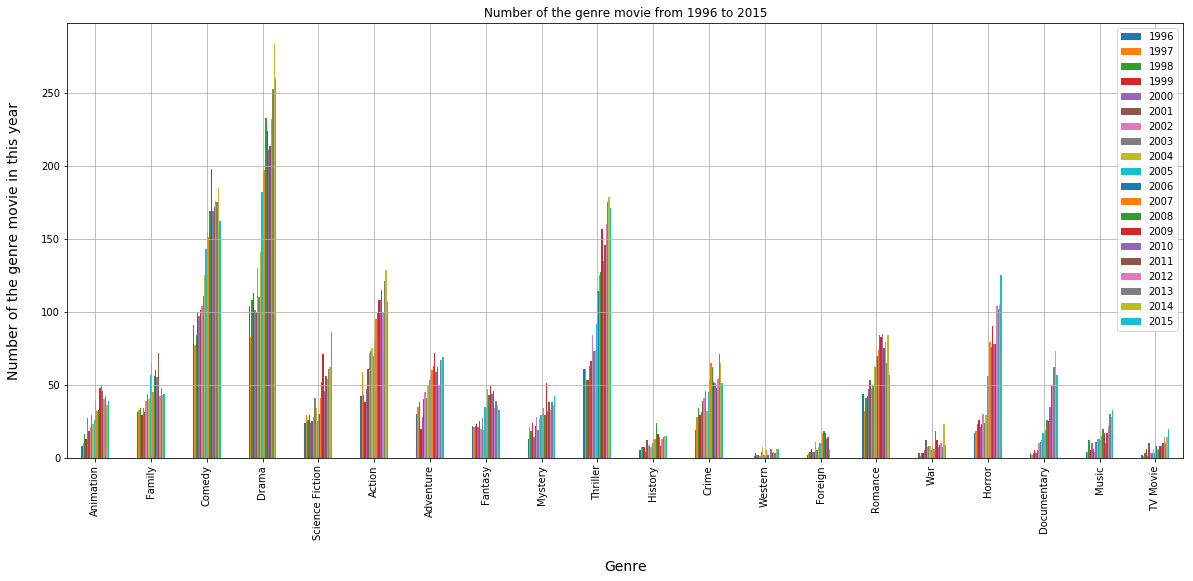

In [145]:
# Let's make some visualization for last 20 years
genre_yr_df[range(1996,2016)].plot(kind="bar", figsize=(20,8))
plt.grid(True);

#Set title
plt.title("Number of the genre movie from 1996 to 2015")
# Set x-axis label
plt.ylabel("Number of the genre movie in this year", labelpad=20, size=14)

# Set y-axis label
plt.xlabel("Genre", labelpad=20, size=14);


Number of movies increased tremendously and drama returned to take the throne of the maximum number of movies again.

Most genre either Drama or Comedy This may be because all of people love it or beacuse drama and comedy are the most repeated genres in this data I will recommed if we want to make a recommendation engine for movies will use comedy and drama movies as interface to any one who is the first time enter the website

### Research Question 11  (What kinds of properties are associated with the most popular companies that produce the movies?)

In [146]:
# Get the movies' counts for each genre 
production_companies_dict=dict()
for production_companies in tmdb_df_clean.production_companies:
    if type(production_companies) is str:
        for production_company in production_companies.split('|'):            
            production_companies_dict[production_company] = production_companies_dict.get(production_company, 0) + 1

In [147]:
# Sort the data to see most popular production company
sorted(production_companies_dict.items(), key=lambda x:x[1], reverse=True)

[('Universal Pictures', 522),
 ('Warner Bros.', 509),
 ('Paramount Pictures', 431),
 ('Twentieth Century Fox Film Corporation', 282),
 ('Columbia Pictures', 272),
 ('New Line Cinema', 219),
 ('Metro-Goldwyn-Mayer (MGM)', 218),
 ('Walt Disney Pictures', 214),
 ('Touchstone Pictures', 178),
 ('Columbia Pictures Corporation', 160),
 ('TriStar Pictures', 147),
 ('Miramax Films', 139),
 ('Relativity Media', 108),
 ('Regency Enterprises', 95),
 ('Canal+', 92),
 ('Village Roadshow Pictures', 88),
 ('DreamWorks SKG', 88),
 ('20th Century Fox', 88),
 ('BBC Films', 87),
 ('Dimension Films', 82),
 ('United Artists', 76),
 ('Orion Pictures', 72),
 ('Fox Searchlight Pictures', 68),
 ('Castle Rock Entertainment', 68),
 ('Working Title Films', 67),
 ('Amblin Entertainment', 65),
 ('StudioCanal', 65),
 ('Lionsgate', 63),
 ('Summit Entertainment', 62),
 ('Fox 2000 Pictures', 58),
 ('Millennium Films', 57),
 ('Lions Gate Films', 56),
 ('Hollywood Pictures', 56),
 ('Dune Entertainment', 55),
 ('Imagine E

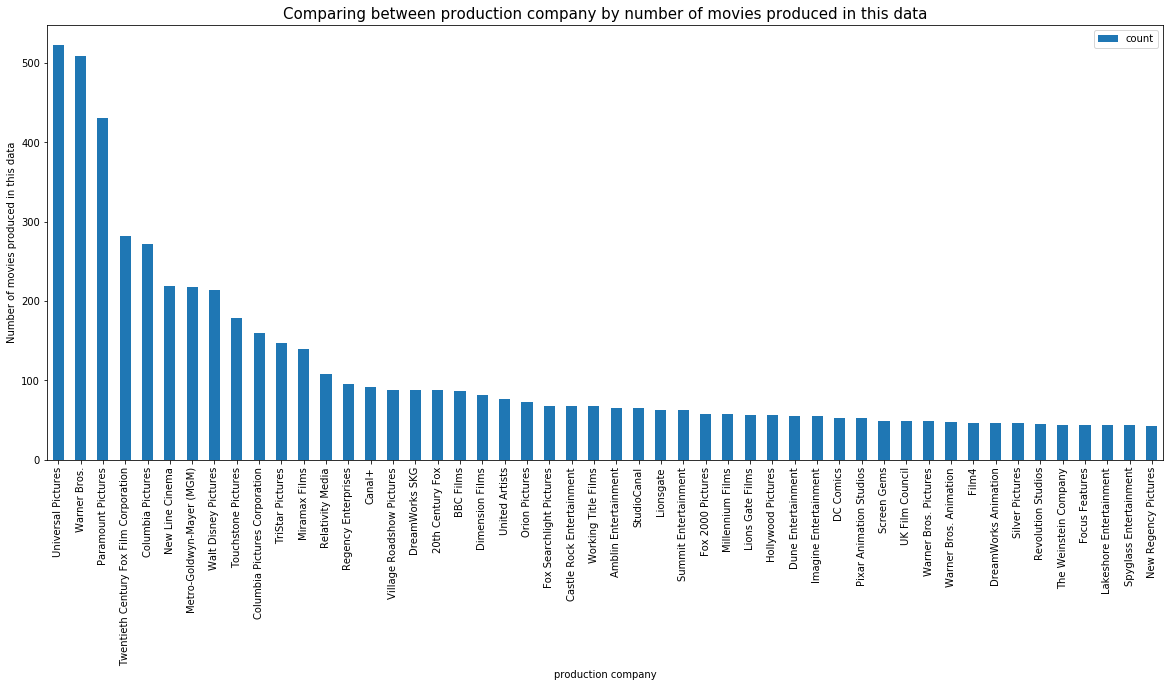

In [148]:
# Make a data fram with the production company data and plot it as barchart
pd.DataFrame(sorted(production_companies_dict.items(), key=lambda x:x[1], reverse=True)[:50], columns=["company","count"]).set_index("company").plot(kind="bar", figsize=(20,8));

# Set a title
plt.title('Comparing between production company by number of movies produced in this data', size=15)

# Set x label
plt.xlabel('production company')
# Set y label
plt.ylabel('Number of movies produced in this data');

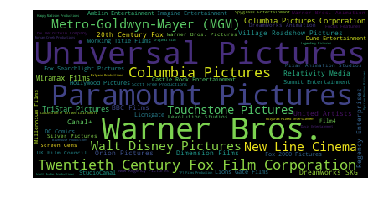

In [149]:
# Let's visualize the genre with most acting 
cloud_production_company = wordcloud.WordCloud()
cloud_production_company.generate_from_frequencies(production_companies_dict)
plt.imshow(cloud_production_company.to_array(), interpolation = 'nearest')
plt.axis('off')
plt.show()

Universal Pictures and Warner Bros are fighting for the first place, Universal Pictures won in this dataset.

### Research Question 12  (What kinds of properties are associated with movie that have most people loves (have highest rating)?)

In [150]:
# Get the properties for highest vote_average
tmdb_df_clean.iloc[tmdb_df_clean.vote_average.idxmax()]

id                                                                 125336
imdb_id                                                         tt2044056
popularity                                                       0.006925
budget                                                        1.46257e+07
revenue                                                                 0
original_title                              The Story of Film: An Odyssey
cast                    Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
homepage                http://www.channel4.com/programmes/the-story-o...
director                                                     Mark Cousins
tagline                                                               NaN
keywords                cinema|nouvelle vague|hindi cinema|cinema novo...
overview                The Story of Film: An Odyssey, written and dir...
runtime                                                                60
genres                                

In [151]:
# How much greater or smaller than the mean of the budget to make a movie
tmdb_df_clean.budget.mean()/1.46257e+07

1.5332173014801767

In [152]:
# Let's see if there are any movie have the same rating
tmdb_df_clean[tmdb_df_clean.vote_average==tmdb_df_clean.vote_average.max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,imdb_url
3894,125336,tt2044056,0.006925,1.462570e+07,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",60,Documentary,NaN,2011-09-03,14,9.2,0.0,0.0,https://www.imdb.com/title/tt2044056


In [153]:
# Let's see the director 
tmdb_df_clean[tmdb_df_clean.director=="Mark Cousins"]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,imdb_url
3894,125336,tt2044056,0.006925,1.462570e+07,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",60,Documentary,NaN,2011-09-03,14,9.2,0.0,0.0,https://www.imdb.com/title/tt2044056


The only film that he has directed.However, it got the highest rating.Hence, it may be another reason. 

In [181]:
# Let's see the casts
check_cast(tmdb_df_clean.vote_average)

Mark Cousins gets 1 movies greater than average and 0 less than the average
Jean-Michel Frodon gets 1 movies greater than average and 0 less than the average
Cari Beauchamp gets 1 movies greater than average and 0 less than the average
Agnes de Mille gets 1 movies greater than average and 0 less than the average


Also the cast that he used are first time to cast.

It's weired that highest movie rating is from a director and casts first time to direct and cast, pay low budget and no one can get the same votes

This is may be becasue no one watched the movie as vote_count is only 14, may be they are the owners of this movie

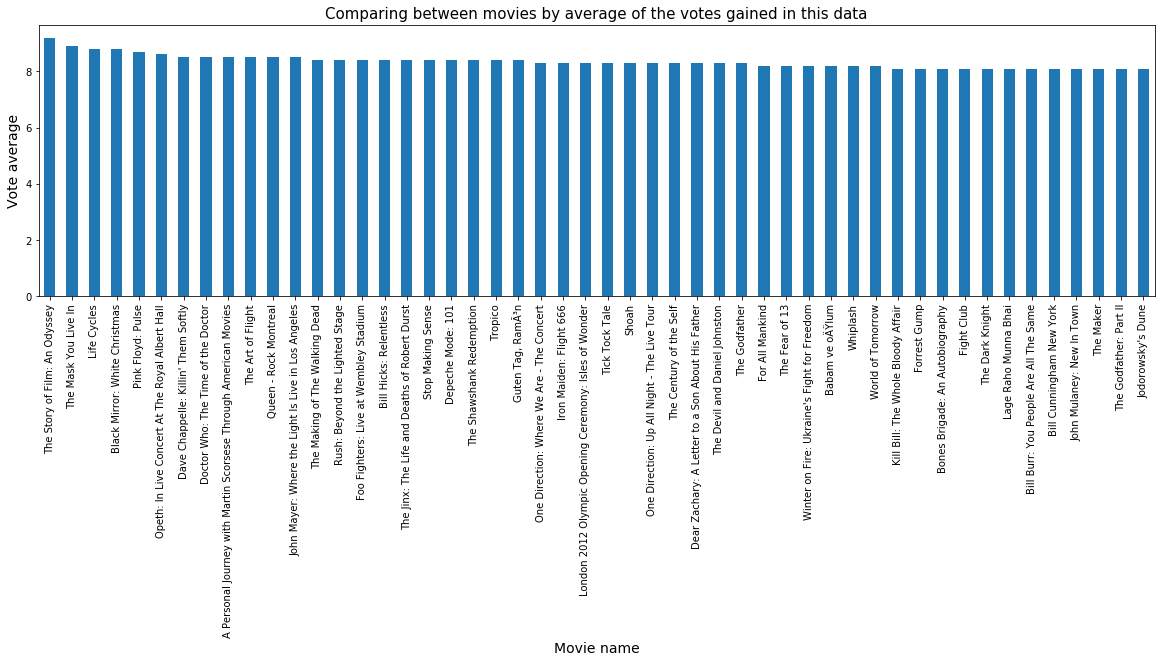

In [182]:
# Let's see the first 50 highest movies' vote average  
tmdb_df_clean[tmdb_df_clean.vote_average>tmdb_df_clean.vote_average.quantile(0.75)].set_index("original_title").vote_average.sort_values(ascending=False)[:50].plot(kind="bar", figsize=(20,5));

# Set a title
plt.title('Comparing between movies by average of the votes gained in this data', size=15)

# Set x label
plt.xlabel('Movie name', size=14)

# Set y label
plt.ylabel('Vote average', size=14);

votes are almost equal but The Story of Film: An Odyssey is slightly higher than all.

### Research Question 13  (What kinds of properties are associated with movie with largest vote_count?)

In [183]:
# Get the properties for highest vote_count
tmdb_df_clean.iloc[tmdb_df_clean.vote_count.idxmax()]

id                                                                 027205
imdb_id                                                         tt1375666
popularity                                                        9.36364
budget                                                            1.6e+08
revenue                                                         825500000
original_title                                                  Inception
cast                    Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...
homepage                            http://inceptionmovie.warnerbros.com/
director                                                Christopher Nolan
tagline                              Your mind is the scene of the crime.
keywords                 loss of lover|dream|sleep|subconsciousness|heist
overview                Cobb, a skilled thief who commits corporate es...
runtime                                                               148
genres                  Action|Thrille

In [184]:
# How much greater or smaller than the mean of the budget to make a movie
tmdb_df_clean.budget.mean()/1.6e+08

0.14015235178911636

In [185]:
# How much greater or smaller than the mean of the revenue to make a movie
tmdb_df_clean.revenue.mean()/825500000

0.04824145341416382

In [186]:
# Let's see if there are any movie have the same count
tmdb_df_clean[tmdb_df_clean.vote_count==tmdb_df_clean.vote_count.max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj,imdb_url
1919,027205,tt1375666,9.363643,160000000.0,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,2010-07-14,9767,7.9,160000000.0,825500000.0,https://www.imdb.com/title/tt1375666


In [187]:
# Check Christopher Nolan the director votes that are greater and less than the average
'Christopher Nolan has directed ' +\
str(tmdb_df_clean[(tmdb_df_clean.director == 'Christopher Nolan') &
                  (tmdb_df_clean.vote_average > tmdb_df_clean.vote_average.mean())].shape[0])+\
' movies greater than average and '+ str(tmdb_df_clean[(tmdb_df_clean.director == 'Christopher Nolan')
                                                       & (tmdb_df_clean.vote_average < tmdb_df_clean.vote_average.mean())].shape[0])+\
' less than the average'

'Christopher Nolan has directed 10 movies greater than average and 0 less than the average'

In [188]:
# Let's see the casts
check_cast(tmdb_df_clean.vote_count)

Leonardo DiCaprio gets 26 movies greater than average and 4 less than the average
Joseph Gordon-Levitt gets 20 movies greater than average and 9 less than the average
Ellen Page gets 9 movies greater than average and 6 less than the average
Tom Hardy gets 16 movies greater than average and 5 less than the average
Ken Watanabe gets 6 movies greater than average and 0 less than the average


It seems that the director and his casts are tremendous
If I want to make a marketing I will make it in this movie or sites that show this movie.

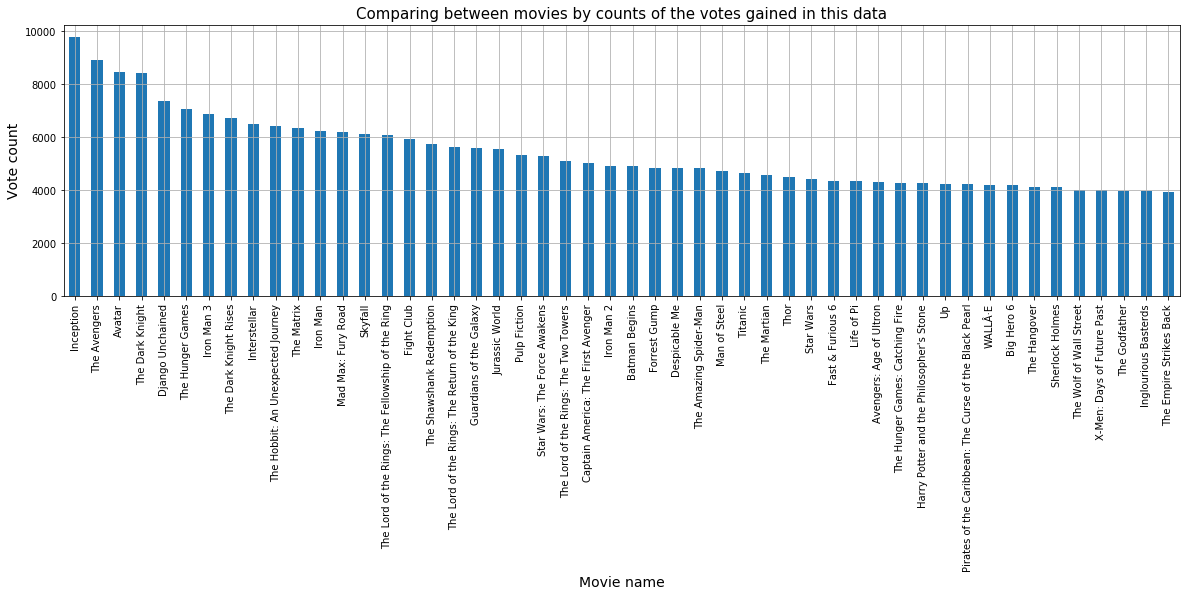

In [189]:
# Visualize the highest count for movies in the data
tmdb_df_clean[tmdb_df_clean.vote_count>tmdb_df_clean.vote_count.quantile(0.75)].set_index("original_title").vote_count.sort_values(ascending=False)[:50].plot(kind="bar", figsize=(20,5))
plt.grid(True);
# Set a title
plt.title('Comparing between movies by counts of the votes gained in this data', size=15)

# Set x label
plt.xlabel('Movie name', size=14)
# Set y label
plt.ylabel('Vote count', size=14);

If I want to make a marketing I will choose one from these high movie counts to make the campaign in it's site.

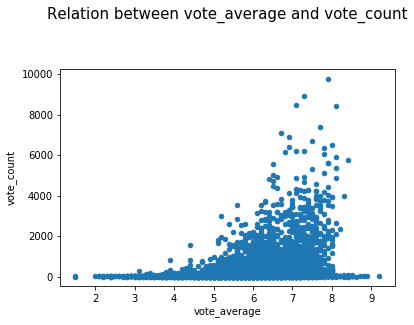

In [190]:
# Get the relation between vote_average and vote_count using scatter plot
tmdb_df_clean.plot(kind='scatter', x='vote_average', y='vote_count');

# Set title
plt.title("Relation between vote_average and vote_count", size=15, pad=50);


At high vote_average the vote_count starts to increase, we can conclude that if you want to gain money from marketing on your site, try to gain high votes as more votes mean more people would like to see the movie, and some who want to see the movie increases more company will want to make marketing in this site, and many channels will buy this movie. Also, high counts may make high votes as the number of viewers to this movie increases the people who like the movie will increase. However, this is not always true many more people watched this movie and gave it a low rating.

### Research Question 14 (What is the year with largest movie released?)

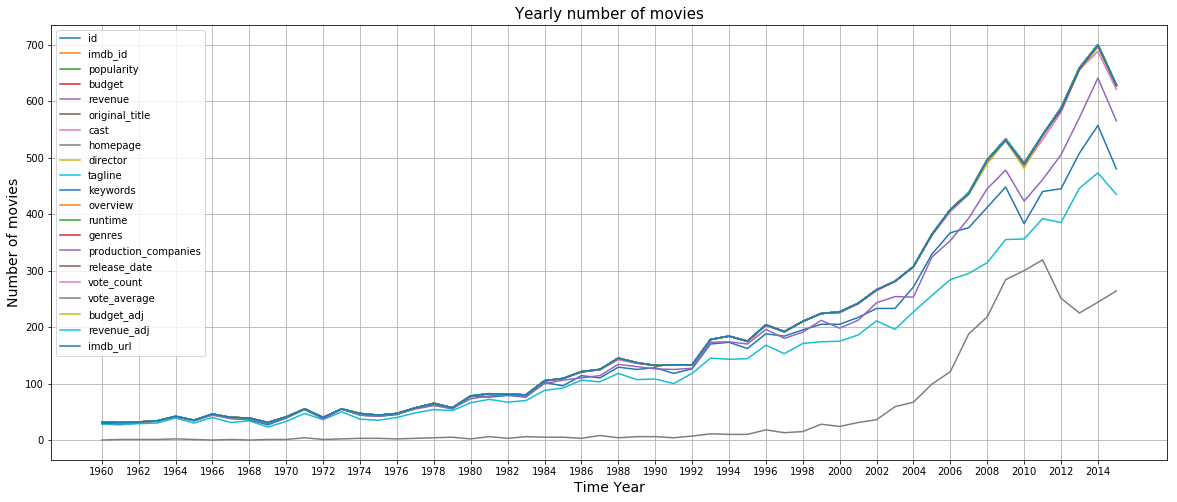

In [191]:
# Group the movie by the year
selected_data = tmdb_df_clean.groupby([tmdb_df_clean['release_date'].dt.year]).count()

# Plot a line
selected_data.plot(kind='line', figsize=(20,8))

# specify the range
plt.xticks(np.arange(1960,2015, 2))
plt.grid(True)

# Set a title
plt.title('Yearly number of movies', size=15)

# Set x label
plt.xlabel('Time Year', size=14)

# Set y label
plt.ylabel('Number of movies', size=14);

It seems number of movie increase from year to year

### Research Question 15  (What is the month with largest movie released?)

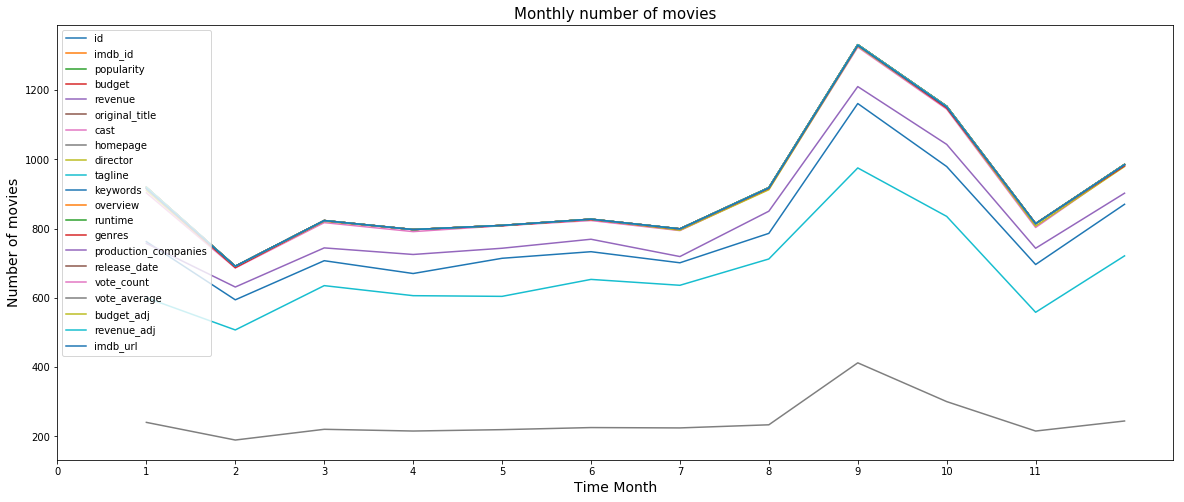

In [192]:
# Group the movie by the month
selected_data = tmdb_df_clean.groupby([tmdb_df_clean['release_date'].dt.month]).count()


# Plot a line
selected_data.plot(kind='line', figsize=(20,8))

# specify the range
plt.xticks(np.arange(0, 12, 1))

# Set a title
plt.title('Monthly number of movies', size=15)

# Set x label
plt.xlabel('Time Month', size=14)

# Set y label
plt.ylabel('Number of movies', size=14);

Number of movie per each month is approximately constant but at month 9 we have the max number of movie released in the data set.

### Research Question 16  (What is the month and year with largest movie released?)

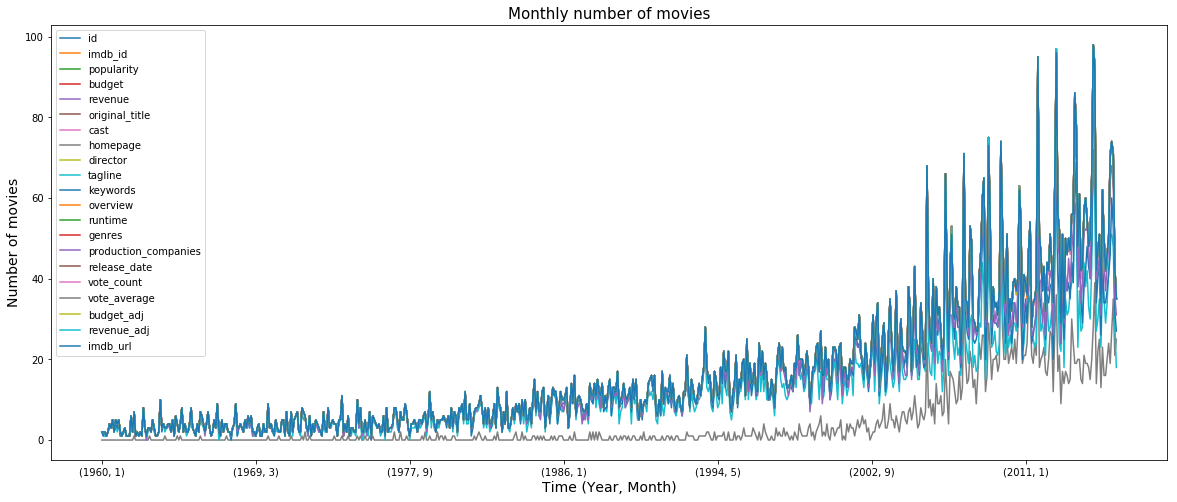

In [193]:
# Group the movie by the month and year
selected_data = tmdb_df_clean.groupby([ tmdb_df_clean['release_date'].dt.year, tmdb_df_clean['release_date'].dt.month]).count()

# Plot a line
selected_data.plot(kind='line', figsize=(20,8))

# Set a title
plt.title('Monthly number of movies', size=15)

# Set x label
plt.xlabel('Time (Year, Month)', size=14)

# Set y label
plt.ylabel('Number of movies', size=14);

Movies are increasingly releasing by time.

### Research Question 17  (What is the actor that brings the highest revenue?)

In [194]:
def get_most(series, column):
    columns=tmdb_df_clean.loc[series>series.quantile(0.75), column]
    dic={}
    for observations in columns:
        if type(observations) is str:
            for observation in observations.split("|"):
                if observation in dic:
                    continue
                greater_than_average=tmdb_df_clean[(tmdb_df_clean[column].str.find(observation)!=-1) &  (tmdb_df_clean[column].notnull())
                                  & (series > series.mean())].shape[0]
                less_than_average=tmdb_df_clean[(tmdb_df_clean[column].str.find(observation)!=-1) &  (tmdb_df_clean[column].notnull())
                                                                & (series < series.mean())].shape[0]
                if greater_than_average>less_than_average:
                    dic[observation]=(greater_than_average, greater_than_average-less_than_average)
    return dic

In [ ]:
# Make a dict with the casts that get revenue larger than average more than the revenue that is less than the average
cast_dict=get_most(tmdb_df_clean.revenue, 'cast')

In [217]:
# Which cast get repeated to get revenue more than average larger time
pd.DataFrame(sorted(cast_dict.items(), key=lambda x:x[1], reverse=True)).rename(columns={0:"cast",1:"count"}).set_index("cast").count

<bound method DataFrame.count of                    count
cast                    
Bruce Willis     (34, 6)
Tom Cruise      (31, 25)
Brad Pitt       (29, 19)
Tom Hanks       (29, 12)
Eddie Murphy    (28, 14)
...                  ...
David Crawford    (1, 1)
Nancy Kyes        (1, 1)
Andrew Sachs      (1, 1)
Edie Adams        (1, 1)
Harold Fong       (1, 1)

[1317 rows x 1 columns]>

To get high revenue choose from Bruce Willis, Tom Cruise, Brad Pitt, Tom Hanks or Eddie Murphy

### Research Question 18  (What is the director that brings the highest revenue)

In [194]:
# What is the director that brings the highest revenue and what is his revenue
tmdb_df_clean.sort_values(by='revenue',ascending=False)[:50][['director', 'revenue']]

,director,revenue
1386,James Cameron,2781505847
3,J.J. Abrams,2068178225
5231,James Cameron,1845034188
4361,Joss Whedon,1519557910
0,Colin Trevorrow,1513528810
4,James Wan,1506249360
14,Joss Whedon,1405035767
3374,David Yates,1327817822
5422,Chris Buck|Jennifer Lee,1274219009
5425,Shane Black,1215439994


This max revenue may be a stroke of luck.So, let's decide by the number of repeating that took a revenue larger than average.

In [218]:
# Make a dict with the director that get revenue larger than average more than the revenue that is less than the average
dir_dict=get_most(tmdb_df_clean.revenue, 'director')

In [219]:
# Which director get repeated to get revenue more than average larger time
pd.DataFrame(sorted(dir_dict.items(), key=lambda x:x[1], reverse=True)).rename(columns={0:"director",1:"count"}).set_index("director").count#.plot(kind="bar");

<bound method DataFrame.count of                      count
director                  
Steven Spielberg  (25, 20)
Clint Eastwood     (20, 6)
Ridley Scott      (17, 11)
Ron Howard        (16, 10)
Tim Burton        (15, 10)
...                    ...
Rouben Mamoulian    (1, 1)
Darryl F. Zanuck    (1, 1)
David Michener      (1, 1)
George Seaton       (1, 1)
Lou Adler           (1, 1)

[442 rows x 1 columns]>

To get high revenue choose from Steven Spielberg, Clint Eastwood or Ridley Scott

### Research Question 19 (What is the production_companies that brings the highest revenue?)

In [220]:
# Make a dict with the keyword that get revenue larger than average more than the revenue that is less than the average
dic=get_most(tmdb_df_clean.revenue, 'production_companies')

In [223]:
# Which director get repeated to get revenue more than average larger time
pd.DataFrame(sorted(dic.items(), key=lambda x:x[1], reverse=True)).rename(columns={0:"production_companies",1:"count"}).set_index("production_companies").count#.plot(kind="bar");

<bound method DataFrame.count of                                             count
production_companies                             
Twentieth Century Fox                   (170, 45)
Twentieth Century Fox Film Corporation  (161, 40)
DreamWorks                               (97, 46)
Relativity Media                         (78, 48)
Village Roadshow Pictures                (65, 41)
...                                           ...
Compass International Pictures             (1, 1)
Falcon International Productions           (1, 1)
Oregon Film Factory                        (1, 1)
Stage III Productions                      (1, 1)
Sellers-Edwards productions                (1, 1)

[958 rows x 1 columns]>

To get high revenue choose from Twentieth Century Fox, Twentieth Century Fox Film Corporation, DreamWorks or Relativity Media                     

### Research Question 20 (What is the runtime that brings the highest revenue?)

In [306]:
def get_most_runtime(series):
    column="runtime"
    columns=tmdb_df_clean.loc[series>series.quantile(0.75), column]
    dic={}
    for observation in columns:
        if observation in dic:
            continue

        greater_than_average=tmdb_df_clean[(tmdb_df_clean[column] == observation) & (series > series.mean())].shape[0]
        less_than_average=tmdb_df_clean[(tmdb_df_clean[column] == observation) & (series < series.mean())].shape[0]
        if greater_than_average>less_than_average:
            dic[observation]=(greater_than_average, greater_than_average-less_than_average)
    return dic

In [307]:
# Make a dict with the keyword that get revenue larger than average more than the revenue that is less than the average
dic=get_most_runtime(tmdb_df_clean.revenue)

In [308]:
# Which director get repeated to get revenue more than average larger time
pd.DataFrame(sorted(dic.items(), key=lambda x:x[1], reverse=True)).rename(columns={0:"runtime",1:"count"}).set_index("runtime").count#.plot(kind="bar");

<bound method DataFrame.count of             count
runtime          
130       (34, 6)
136      (24, 14)
131       (24, 1)
143       (13, 5)
141       (12, 1)
146       (10, 6)
157        (8, 4)
154        (7, 1)
170        (6, 5)
147        (5, 3)
165        (5, 3)
162        (5, 2)
169        (4, 3)
151        (4, 1)
175        (3, 1)
183        (3, 1)
189        (2, 1)
159        (2, 1)
195        (2, 1)
197        (2, 1)
705        (1, 1)
194        (1, 1)
200        (1, 1)
216        (1, 1)>

To get a good choose your runtime between 130-140

### Research Question 21 (What is the month that brings the highest revenue?)

In [332]:
def get_most_month(series):
    columns=tmdb_df_clean.loc[series>series.quantile(0.75), "release_date"]
    dic={}
    for observation in columns.dt.month:
        if observation in dic:
            continue
        greater_than_average=tmdb_df_clean[(tmdb_df_clean["release_date"].dt.month == observation) &  (tmdb_df_clean["release_date"].notnull())
                          & (series > series.mean())].shape[0]
        less_than_average=tmdb_df_clean[(tmdb_df_clean["release_date"].dt.month == observation) &  (tmdb_df_clean["release_date"].notnull())
                                                        & (series < series.mean())].shape[0]
        if greater_than_average>less_than_average:
            dic[observation]=(greater_than_average, greater_than_average-less_than_average)
    return dic

In [333]:
# Make a dict with the month that get vote_average larger than average more than the revenue that is less than the average
dic=get_most_month(tmdb_df_clean.revenue)

In [334]:
dic

{}

revenue independent on the month

### Research Question 22 (What is the actor that brings the highest vote_average?)

In [297]:
# Make a dict with the casts that get vote_average larger than average more than the revenue that is less than the average
cast_dict=get_most(tmdb_df_clean.vote_average, 'cast')

In [298]:
# Which cast get repeated to get vote_average more than average larger time
pd.DataFrame(sorted(cast_dict.items(), key=lambda x:x[1], reverse=True)).rename(columns={0:"cast",1:"count"}).set_index("cast").count

<bound method DataFrame.count of                             count
cast                             
Adam                    (161, 25)
Mars                      (66, 9)
Robert De Niro           (49, 26)
Meryl Streep             (36, 28)
Johnny Depp              (36, 26)
...                           ...
Michael Hynson             (1, 1)
Robert August              (1, 1)
Lord 'Tally Ho' Blears     (1, 1)
Bruce Brown                (1, 1)
Chip Fitzwater             (1, 1)

[5388 rows x 1 columns]>

To get high vote_average choose from Adam, Mars, Robert De Niro, Meryl Streep or Johnny Depp  

### Research Question 23 (What is the director that brings the highest vote_average?)

In [335]:
# Make a dict with the director that get vote_average larger than average more than the revenue that is less than the average
dir_dict=get_most(tmdb_df_clean.vote_average, 'director')

In [336]:
# Which director get repeated to get vote_average more than average larger time
pd.DataFrame(sorted(dir_dict.items(), key=lambda x:x[1], reverse=True)).rename(columns={0:"director",1:"count"}).set_index("director").count#.plot(kind="bar");

<bound method DataFrame.count of                        count
director                    
Woody Allen         (35, 24)
Martin Scorsese     (27, 23)
Steven Spielberg    (26, 22)
Clint Eastwood      (26, 18)
Ridley Scott        (19, 15)
...                      ...
Douglas Hickox        (1, 1)
Charlotte Zwerin      (1, 1)
Ben Washam            (1, 1)
FranÃ§ois Truffaut    (1, 1)
Bruce Brown           (1, 1)

[1491 rows x 1 columns]>

TO get high vote average choose a director from Woody Allen, Martin Scorsese, Steven Spielberg, Clint Eastwood or Ridley Scott 

### Research Question 24 (What is the production_companies that brings the highest vote_average?)

In [340]:
# Make a dict with the production_companies that get vote_average larger than average more than the revenue that is less than the average
dic=get_most(tmdb_df_clean.vote_average, 'production_companies')

In [341]:
# Which production_companies get repeated to get vote_average more than average larger time
pd.DataFrame(sorted(dic.items(), key=lambda x:x[1], reverse=True)).rename(columns={0:"production_companies",1:"count"}).set_index("production_companies").count#.plot(kind="bar");

<bound method DataFrame.count of                              count
production_companies              
Warner Bros.            (376, 131)
Universal                (337, 76)
Universal Pictures       (306, 82)
Paramount               (282, 101)
Paramount Pictures      (267, 101)
...                            ...
Anglo Enterprises           (1, 1)
Vineyard Film Ltd.          (1, 1)
Chenault Productions        (1, 1)
Carlo Ponti Production      (1, 1)
Bruce Brown Films           (1, 1)

[2116 rows x 1 columns]>

To get high vote average choose from Warner Bros, Universal, Paramount or Paramount Pictures.

### Research Question 25 (What is the runtime that brings the highest vote_average?)

In [342]:
# Make a dict with the runtime that get vote_average larger than average more than the revenue that is less than the average
dic=get_most_runtime(tmdb_df_clean.vote_average)

In [343]:
# Which director get repeated to get vote_average more than average larger time
pd.DataFrame(sorted(dic.items(), key=lambda x:x[1], reverse=True)).rename(columns={0:"runtime",1:"count"}).set_index("runtime").count#.plot(kind="bar");

<bound method DataFrame.count of              count
runtime           
100       (173, 9)
102      (130, 31)
107      (123, 52)
103      (121, 29)
106      (119, 26)
...            ...
417         (1, 1)
372         (1, 1)
230         (1, 1)
200         (1, 1)
216         (1, 1)

[181 rows x 1 columns]>

To get high vote average choose from 100-106 min

### Research Question 26 (What is the month that brings the highest vote_average?)

In [344]:
# Make a dict with the month that get vote_average larger than average more than the revenue that is less than the average
dic=get_most_month(tmdb_df_clean.vote_average)

In [345]:
# Which month get repeated to get vote_average more than average larger time
pd.DataFrame(sorted(dic.items(), key=lambda x:x[1], reverse=True)).rename(columns={0:"month",1:"count"}).set_index("month").count#.plot(kind="bar");

<bound method DataFrame.count of             count
month            
9      (774, 217)
12     (624, 263)
10      (608, 63)
11     (466, 118)
6       (454, 81)
3       (430, 37)
5       (425, 41)
7       (410, 21)
2       (353, 15)>

To get high vote average choose from 9, 12, 10 or 11

### Research Question 27 (What is the actor that brings the highest vote_count?)

In [346]:
# Make a dict with the casts that get vote_count larger than average more than the revenue that is less than the average
cast_dict=get_most(tmdb_df_clean.vote_count, 'cast')

In [347]:
# Which cast get repeated to get vote_average more than average larger time
pd.DataFrame(sorted(cast_dict.items(), key=lambda x:x[1], reverse=True)).rename(columns={0:"cast",1:"count"}).set_index("cast").count

<bound method DataFrame.count of                       count
cast                       
Johnny Depp        (32, 18)
Brad Pitt          (29, 19)
Jason Statham      (27, 22)
Adam Sandler       (27, 19)
Cameron Diaz       (26, 14)
...                     ...
Scott H. Reiniger    (1, 1)
David Crawford       (1, 1)
Nancy Kyes           (1, 1)
Thurl Ravenscroft    (1, 1)
Dal McKennon         (1, 1)

[1348 rows x 1 columns]>

To get high vote count choose from Johnny Depp, Brad Pittm, Jason Statham, Adam Sandler or Cameron Diaz 

### Research Question 28 (What is the director that brings the highest vote_count?)

In [203]:
# Make a dict with the director that get vote_count larger than average more than the revenue that is less than the average
dir_dict=get_most(tmdb_df_clean.vote_count, 'director')

In [204]:
# Which director get repeated to get vote_average more than average larger time
pd.DataFrame(sorted(dir_dict.items(), key=lambda x:x[1], reverse=True)).rename(columns={0:"director",1:"count"}).set_index("director").count#.plot(kind="bar");

<bound method DataFrame.count of                      count
director                  
Steven Spielberg  (23, 16)
Tim Burton        (16, 12)
Robert Zemeckis   (15, 13)
Ridley Scott       (15, 7)
Robert Rodriguez   (13, 7)
...                    ...
Jim Sharman         (1, 1)
Mel Stuart          (1, 1)
Clyde Geronimi      (1, 1)
Hamilton Luske      (1, 1)
Ben Washam          (1, 1)

[514 rows x 1 columns]>

To get high vote count choose from Steven Spielberg, Tim Burton, Robert Zemeckis, Ridley Scott or Robert Rodriguez

### Research Question 29 (What is the production_companies that brings the highest vote_count?)

In [348]:
# Make a dict with the production_companies that get vote_count larger than average more than the revenue that is less than the average
dir_dict=get_most(tmdb_df_clean.vote_count, 'production_companies')


In [349]:
# Which production_companies get repeated to get vote_average more than average larger time
pd.DataFrame(sorted(dir_dict.items(), key=lambda x:x[1], reverse=True)).rename(columns={0:"production_companies",1:"count"}).set_index("production_companies").count#.plot(kind="bar");

<bound method DataFrame.count of                                      count
production_companies                      
DreamWorks                        (93, 38)
Relativity Media                  (86, 64)
DreamWorks SKG                    (65, 42)
Dune Entertainment                (59, 44)
Village Roadshow Pictures         (50, 11)
...                                    ...
Compass International Pictures      (1, 1)
Falcon International Productions    (1, 1)
Oregon Film Factory                 (1, 1)
Stage III Productions               (1, 1)
The Cat in the Hat Productions      (1, 1)

[1076 rows x 1 columns]>

To get high vote count DreamWorks, Relativity Media, DreamWorks SKG or Dune Entertainment 

### Research Question 25 (What is the runtime that brings the highest vote_count?)

In [350]:
# Make a dict with the runtime that get vote_count larger than average more than the revenue that is less than the average
dic=get_most_runtime(tmdb_df_clean.vote_count)

In [351]:
# Which runtime get repeated to get vote_average more than average larger time
pd.DataFrame(sorted(dic.items(), key=lambda x:x[1], reverse=True)).rename(columns={0:"runtime",1:"count"}).set_index("runtime").count#.plot(kind="bar");

<bound method DataFrame.count of            count
runtime         
130      (32, 2)
136      (21, 8)
143      (12, 3)
146       (9, 4)
157       (8, 4)
154       (7, 1)
153       (6, 1)
147       (5, 3)
165       (5, 3)
169       (4, 3)
170       (4, 1)
189       (2, 1)
31        (1, 1)
705       (1, 1)
194       (1, 1)
229       (1, 1)
200       (1, 1)
216       (1, 1)>

To get high vote count choose runtime between 130-140

### Research Question 26 (What is the month that brings the highest vote_count?)

In [352]:
# Make a dict with the month that get vote_count larger than average more than the revenue that is less than the average
dic=get_most_month(tmdb_df_clean.vote_count)    

In [354]:
dic

{}

vote count independent in the month


<a id='conclusions'></a>
## Conclusions


According to the budget and revenue a good film is mostly by a good director

### IF you want to make a movie:
1. Depends on the popularity or most reapeting choose:
    * Director: Woody Allen, Clint Eastwood, Martin Scorsese, or Steven Spielberg
    * Cast: choose 5 casts choose them from [most acting actors](#Research-Question-3--(who-is-the-most-acting-actor?)) 
    * Genre: choose only 2-3 genres 2 of them are drama and comedy and the third one Thriller, Action, Romance, Horror, Adventure or crime
    * Budget: 1.462570 × 10<sup>7</sup>
    * Keyword: woman director, independent film, based on novel, sex, sport or murder
    * Production company: Universal Pictures, Warner Bros or Paramount Pictures.
    * Runtime:  90 minutes
    * Released month: 9 (September)
2. To get high revenue choose:
    * Director: Steven Spielberg, Clint Eastwood, Ridley Scott or Ron Howard.
    * Cast: choose 5 casts Bruce Willis, Tom Cruise, Brad Pitt, Tom Hanks or Eddie Murphy 
    * Genre: choose only 2-3 genres 2 of them are drama and comedy
    * Budget: according to the correlation high budget equal high revenue but correlation doesn't always mean causation.
    * Production company: Twentieth Century Fox, Twentieth Century Fox Film Corporation, DreamWorks, Relativity Media, Village or Roadshow Pictures                      
    * Runtime:  130-140 minutes
3. To get high vote average choose:
    * Director: Woody Allen, Martin Scorsese, Steven Spielberg or Clint Eastwood. 
    * Cast: choose 5 casts from Adam, Mars, Robert De Niro, Meryl Streep or Johnny Depp
    * Genre: choose only 2-3 genres 2 of them are drama and comedy
    * Production company: Warner Bros, Universal, Paramount or Paramount Pictures.
    * Runtime:  100-106 minutes
    * Released month: 9, 12, 10 or 11
4. To get high vote counts choose:
    * Director: Steven Spielberg, Tim Burton, Robert Zemeckis, Ridley Scott or Robert Rodriguez
    * Cast: Johnny Depp, Brad Pittm, Jason Statham, Adam Sandler or Cameron Diaz
    * Genre: choose only 2-3 genres 2 of them are drama and comedy
    * Production company: DreamWorks, Relativity Media, DreamWorks SKG or Dune Entertainment 
    * Runtime: 130-140 minutes


### IF you want to watch a movie or make a recommendation engine:
1. Depends on the popularity or most reapeting choose the movies that contain:
    * Director: Woody Allen, Clint Eastwood, Martin Scorsese, or Steven Spielberg
    * Cast: choose 5 casts choose them from [most acting actors](#Research-Question-3--(who-is-the-most-acting-actor?)) 
    * Genre: choose only 2-3 genres 2 of them are drama and comedy and the third one Thriller, Action, Romance, Horror, Adventure or crime
    * Budget: 1.462570 × 10<sup>7</sup>
    * Keyword: woman director, independent film, based on novel, sex, sport or murder
    * Production company: Universal Pictures, Warner Bros or Paramount Pictures.
    * Runtime:  90 minutes
    * Released month: 9 (September)
   
2. Depends on high vote average choose:
    * Director: Woody Allen, Martin Scorsese, Steven Spielberg or Clint Eastwood. 
    * Cast: choose 5 casts from Adam, Mars, Robert De Niro, Meryl Streep or Johnny Depp
    * Genre: choose only 2-3 genres 2 of them are drama and comedy
    * Production company: Warner Bros, Universal, Paramount or Paramount Pictures.
    * Runtime:  100-106 minutes
    * Released month: 9, 12, 10 or 11
    
3. Depends onhigh vote counts choose:
    * Director: Steven Spielberg, Tim Burton, Robert Zemeckis, Ridley Scott or Robert Rodriguez
    * Cast: Johnny Depp, Brad Pittm, Jason Statham, Adam Sandler or Cameron Diaz
    * Genre: choose only 2-3 genres 2 of them are drama and comedy
    * Production company: DreamWorks, Relativity Media, DreamWorks SKG or Dune Entertainment 
    * Runtime: 130-140 minutes


### limitations
*  Is the data provided by the dataset sufficient to answer your question?
> The data is sufficient. However, I needed to use imdb to get some missing or wrong data as director or runtime
* Is the size of the dataset is sufficient to give a good judgement about the questions you asked?
> Yes the size is sufficient
* What are the major difficulties you encountered in the dataset while performing the analysis?
> The data is out of date we are in 2020 and many movies has been released, I will need to gather more data till 2020 to make a better recommendation engine

__________
